In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [181]:
silmarillion_sentiments=pd.read_csv(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\The_Silmarillion\silmarillion_sentiments.csv')
silmarillion_sentiments=silmarillion_sentiments.drop(columns=['Unnamed: 0'])
silmarillion_sentiments.head()

Chapters                                               Text  Total_words  Lex_density  Lex_density_norm  Negative   Neutral  Positive  Compound    Rating  Polarity  Subjectivity  Positive_NRC  Negative_NRC     Anger  Anticipation   Disgust      Fear       Joy   Sadness  Surprise     Trust  word_count
0                                        Ainulindalë  Ainulindale   The Music of the Ainur    There ...        20310     0.216064          0.221802  0.041515  0.868262  0.090243  0.221757  Positive  0.183743      0.500935      0.034466      0.016872  0.006267      0.020487  0.001928  0.008436  0.017836  0.013497  0.004097  0.013979        4149
1                                         Valaquenta  VALAQUENTA    Account of the Valar and Maiar a...        18190     0.249122          0.249122  0.062664  0.842964  0.094400  0.095772  Positive  0.100240      0.362949      0.045276      0.024601  0.011777      0.020675  0.009422  0.013347  0.018320  0.014656  0.005234  0.019367        3821
2                           Of the Beginning of Days  Chapter 1   Of the Beginning of Days     It is...        20889     0.246302          0.252035  0.063476  0.862181  0.074400  0.058558  Positive  0.112433      0.436940      0.046956      0.029967  0.012506      0.028315  0.007787  0.020057  0.023124  0.019349  0.010146  0.023832        4238
3                                Of Aulë and Yavanna  Chapter 2   Of Aule and Yavanna   It is told t...        10463     0.276020          0.276020  0.037605  0.890349  0.072081  0.128009  Positive  0.104765      0.337905      0.028816      0.017560  0.009455      0.024313  0.005403  0.008555  0.014858  0.005403  0.007204  0.019811        2221
4  Of the Coming of the Elves and the Captivity o...  Chapter 3   Of the Coming of the Elves and the...        21285     0.233488          0.246221  0.077031  0.849608  0.073338 -0.008435   Neutral  0.137582      0.445595      0.039786      0.026989  0.012331      0.023499  0.007911  0.020707  0.013495  0.016519  0.006049  0.020707        4298

In [137]:
silmarillion_sentiments.describe()

Total_words  Lex_density  Lex_density_norm   Negative    Neutral  \
count     28.000000    28.000000         28.000000  28.000000  28.000000   
mean   25391.178571     0.245196          0.270945   0.067463   0.857343   
std    18262.771762     0.061431          0.040695   0.022431   0.021972   
min     3440.000000     0.140004          0.221802   0.020013   0.812944   
25%    14347.750000     0.219215          0.249126   0.052446   0.844428   
50%    20599.500000     0.242652          0.258576   0.069895   0.855361   
75%    27417.500000     0.270979          0.273501   0.085798   0.864048   
max    75748.000000     0.411856          0.411856   0.098428   0.910294   

        Positive   Compound   Polarity  Subjectivity  Positive_NRC  \
count  28.000000  28.000000  28.000000     28.000000     28.000000   
mean    0.075193   0.050711   0.107707      0.413024      0.039740   
std     0.015282   0.113623   0.057837      0.045440      0.007644   
min     0.050603  -0.136219   0.002558      0.337905      0.026750   
25%     0.066952  -0.049341   0.065614      0.372094      0.034375   
50%     0.073356   0.050640   0.107181      0.416601      0.040068   
75%     0.079033   0.130811   0.140923      0.446445      0.044067   
max     0.130981   0.250856   0.213627      0.506887      0.059239   

       Negative_NRC      Anger  Anticipation    Disgust       Fear        Joy  \
count     28.000000  28.000000     28.000000  28.000000  28.000000  28.000000   
mean       0.028804   0.012898      0.021671   0.008421   0.017976   0.015295   
std        0.008155   0.003652      0.004115   0.002536   0.006900   0.005177   
min        0.008523   0.005682      0.013262   0.001928   0.001420   0.008086   
25%        0.025702   0.010841      0.019618   0.007111   0.015386   0.011231   
50%        0.029692   0.012673      0.021906   0.008363   0.018840   0.014176   
75%        0.033714   0.015761      0.023584   0.010044   0.021513   0.018394   
max        0.041757   0.019041      0.029968   0.014797   0.034241   0.025575   

         Sadness   Surprise      Trust    word_count  
count  28.000000  28.000000  28.000000     28.000000  
mean    0.016138   0.007344   0.021624   5207.785714  
std     0.004618   0.002333   0.003993   3776.803806  
min     0.005403   0.003069   0.012929    704.000000  
25%     0.013417   0.005809   0.019126   2954.750000  
50%     0.015880   0.007180   0.022625   4193.500000  
75%     0.019414   0.008723   0.024110   5588.750000  
max     0.026750   0.012158   0.027541  15841.000000

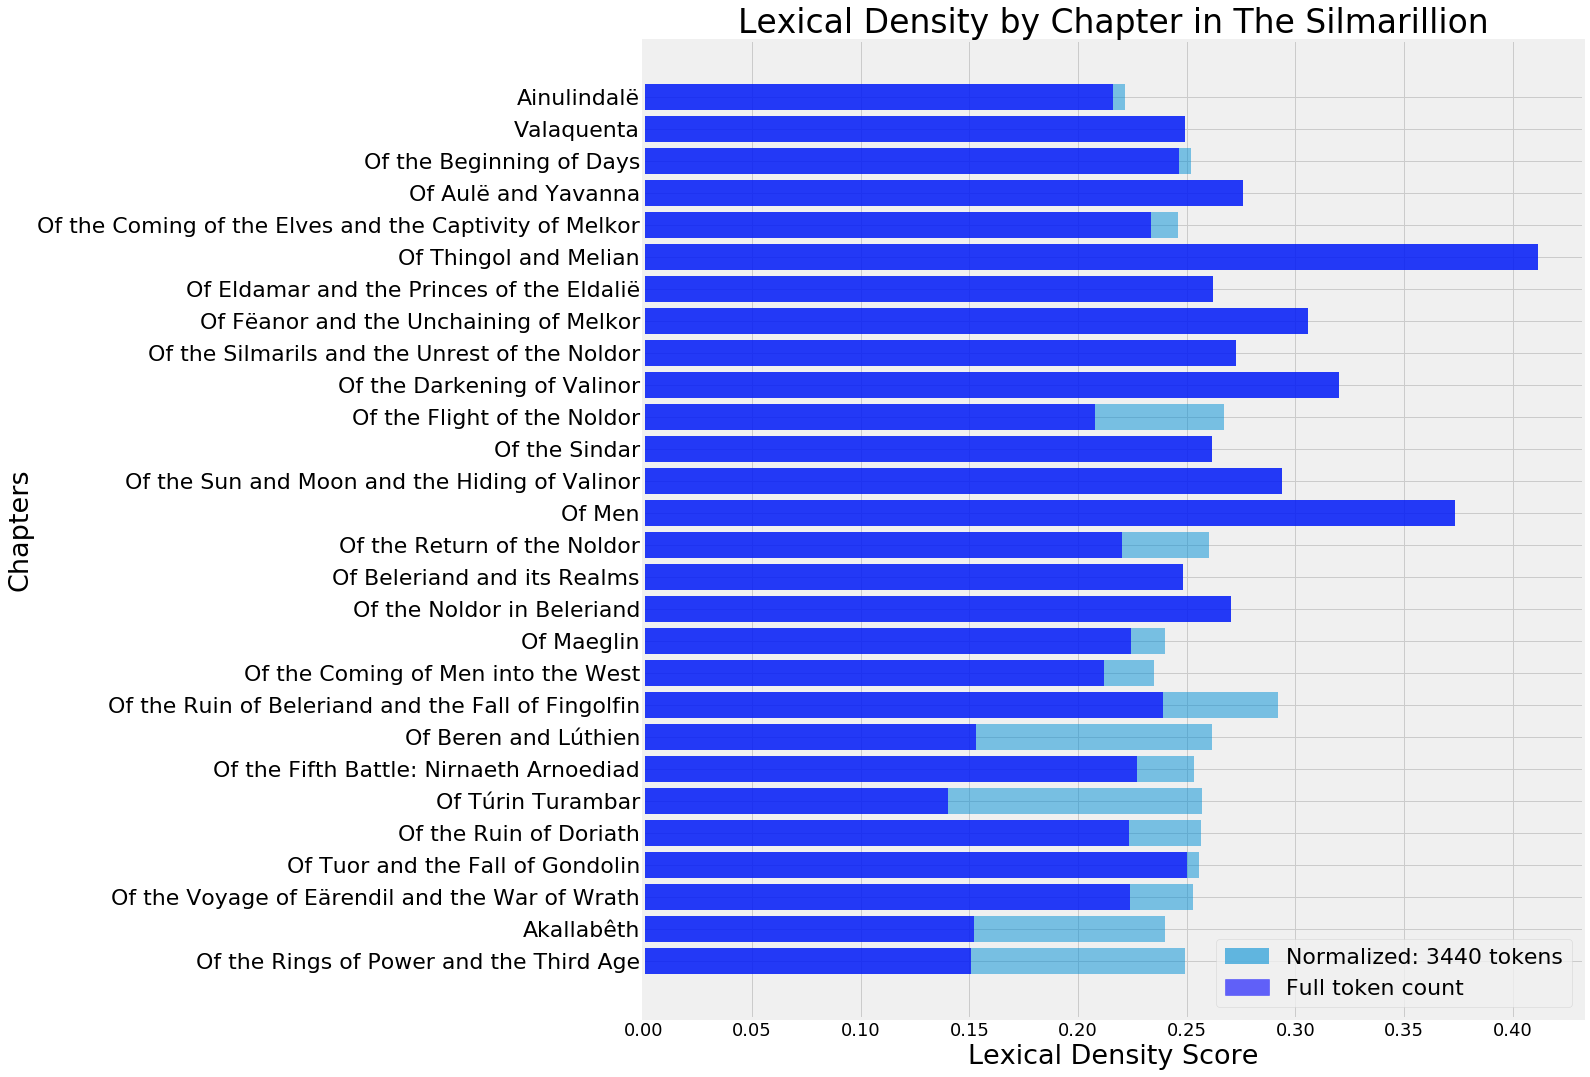

In [118]:
import matplotlib.patches as mpatches

kwargs = dict(alpha=0.6)

patch1 = mpatches.Patch(label='Normalized: 3440 tokens', **kwargs)
patch2 = mpatches.Patch(color='b', label='Full token count', **kwargs)
all_handles = (patch1, patch2)

fig, ax = plt.subplots(figsize=(15, 18))
ax.set_alpha(0.7)
ax.barh(silmarillion_sentiments['Chapters'], silmarillion_sentiments['Lex_density_norm'],alpha=.5)
ax.barh(silmarillion_sentiments['Chapters'], silmarillion_sentiments['Lex_density'],color='b',alpha=.7)
ax.set_title("Lexical Density by Chapter in The Silmarillion",fontsize=33)
ax.set_xlabel("Lexical Density Score", fontsize=27)
ax.set_ylabel("Chapters", fontsize=27)
#ax.set_xticklabels([-0.15,-0.10,-0.05,0.00,0.05,0.10,0.15,0.20,0.25],fontsize=20)
ax.set_yticklabels(silmarillion_sentiments.Chapters, rotation=0, fontsize=22)
ax.legend(handles=all_handles,loc='lower right', fontsize=22)
ax.tick_params(axis='x', which='major', labelsize=18)
ax.invert_yaxis()
#plt.show()

plt.savefig(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\The_Silmarillion\Lexical_Diversity.png',bbox_inches='tight')

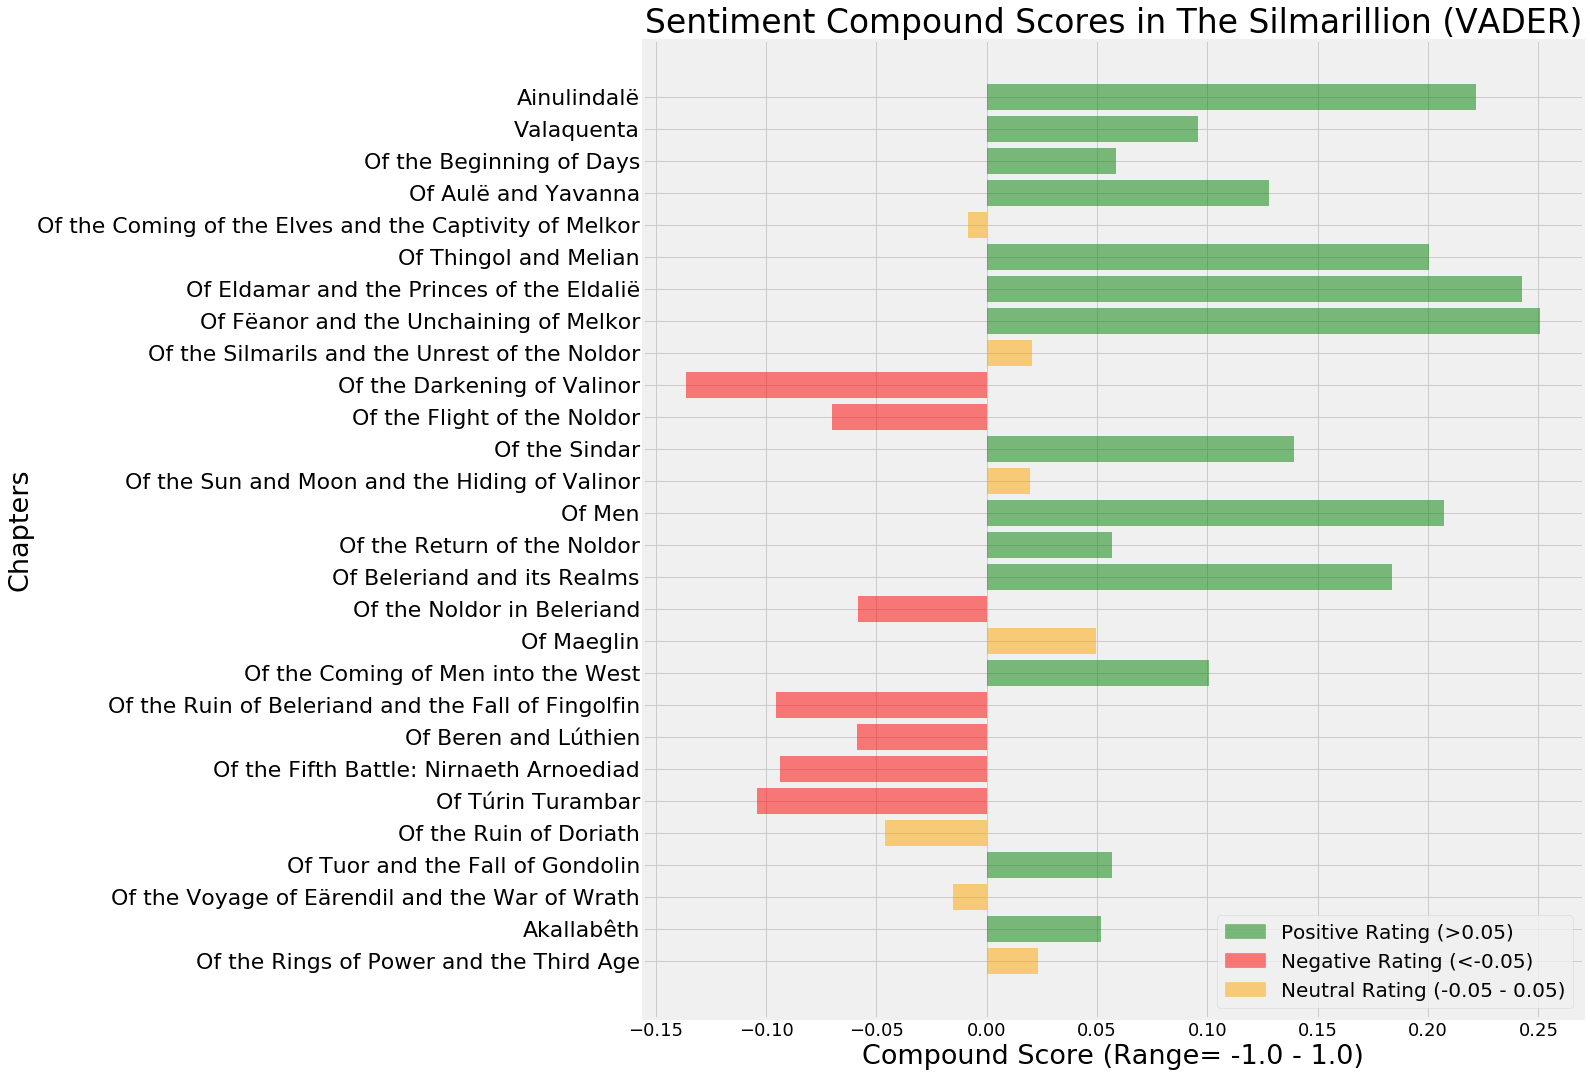

In [119]:
import matplotlib.patches as mpatches

kwargs = dict(alpha=0.5)

patch1 = mpatches.Patch(color='g', label='Positive Rating (>0.05)', **kwargs)
patch2 = mpatches.Patch(color='r', label='Negative Rating (<-0.05)', **kwargs)
patch3 = mpatches.Patch(color='orange', label='Neutral Rating (-0.05 - 0.05)', **kwargs)
all_handles = (patch1, patch2, patch3)

fig, ax = plt.subplots(figsize=(15, 18))
ax.set_alpha(0.5)
ax.barh(silmarillion_sentiments['Chapters'], silmarillion_sentiments['Compound'],
        color=silmarillion_sentiments.Rating.map({'Positive': 'g', 'Negative': 'r', 'Neutral': 'orange'}),
        alpha=.5)
ax.set_title("Sentiment Compound Scores in The Silmarillion (VADER)",fontsize=33)
ax.set_xlabel("Compound Score (Range= -1.0 - 1.0)", fontsize=27)
ax.set_ylabel("Chapters", fontsize=27)
#ax.set_xticklabels([-0.15,-0.10,-0.05,0.00,0.05,0.10,0.15,0.20,0.25],fontsize=20)
ax.set_yticklabels(silmarillion_sentiments.Chapters, rotation=0, fontsize=22)
ax.legend(handles=all_handles,loc='lower right', fontsize=20)
ax.tick_params(axis='x', which='major', labelsize=18)
ax.invert_yaxis()
#plt.show()

plt.savefig(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\The_Silmarillion\VADER_compound.png',bbox_inches='tight')

In [148]:
print ('--- Sentiment Scores for The Silmarillion Averaged Across Chapters ---')
print ('\n')
print ('-- TEXT BLOB --')
print ('Polarity: {0:.3f}'.format(silmarillion_sentiments['Polarity'].mean()))
print ('Subjectivity: {0:.3f}'.format(silmarillion_sentiments['Subjectivity'].mean()))
print ('\n')
print ('-- VADER --')
print ('Positive: {0:.3f}'.format(silmarillion_sentiments['Positive'].mean()))
print ('Negative: {0:.3f}'.format(silmarillion_sentiments['Negative'].mean()))
print ('Neutral: {0:.3f}'.format(silmarillion_sentiments['Neutral'].mean()))
print ('Compound: {0:.3f}'.format(silmarillion_sentiments['Compound'].mean()))
print ('\n')
print ('-- NRC --')
print ('Positive: {0:.3f}'.format(silmarillion_sentiments['Positive_NRC'].mean()))
print ('Joy: {0:.3f}'.format(silmarillion_sentiments['Joy'].mean()))
print ('Anticipation: {0:.3f}'.format(silmarillion_sentiments['Anticipation'].mean()))
print ('Surprise: {0:.3f}'.format(silmarillion_sentiments['Surprise'].mean()))
print ('Trust: {0:.3f}'.format(silmarillion_sentiments['Trust'].mean()))
print ('Negative: {0:.3f}'.format(silmarillion_sentiments['Negative_NRC'].mean()))
print ('Anger: {0:.3f}'.format(silmarillion_sentiments['Anger'].mean()))
print ('Fear: {0:.3f}'.format(silmarillion_sentiments['Fear'].mean()))
print ('Disgust: {0:.3f}'.format(silmarillion_sentiments['Disgust'].mean()))
print ('Sadness: {0:.3f}'.format(silmarillion_sentiments['Sadness'].mean()))

--- Sentiment Scores for The Silmarillion Averaged Across Chapters ---


-- TEXT BLOB --
Polarity: 0.108
Subjectivity: 0.413


-- VADER --
Positive: 0.075
Negative: 0.067
Neutral: 0.857
Compound: 0.051


-- NRC --
Positive: 0.040
Joy: 0.015
Anticipation: 0.022
Surprise: 0.007
Trust: 0.022
Negative: 0.029
Anger: 0.013
Fear: 0.018
Disgust: 0.008
Sadness: 0.016


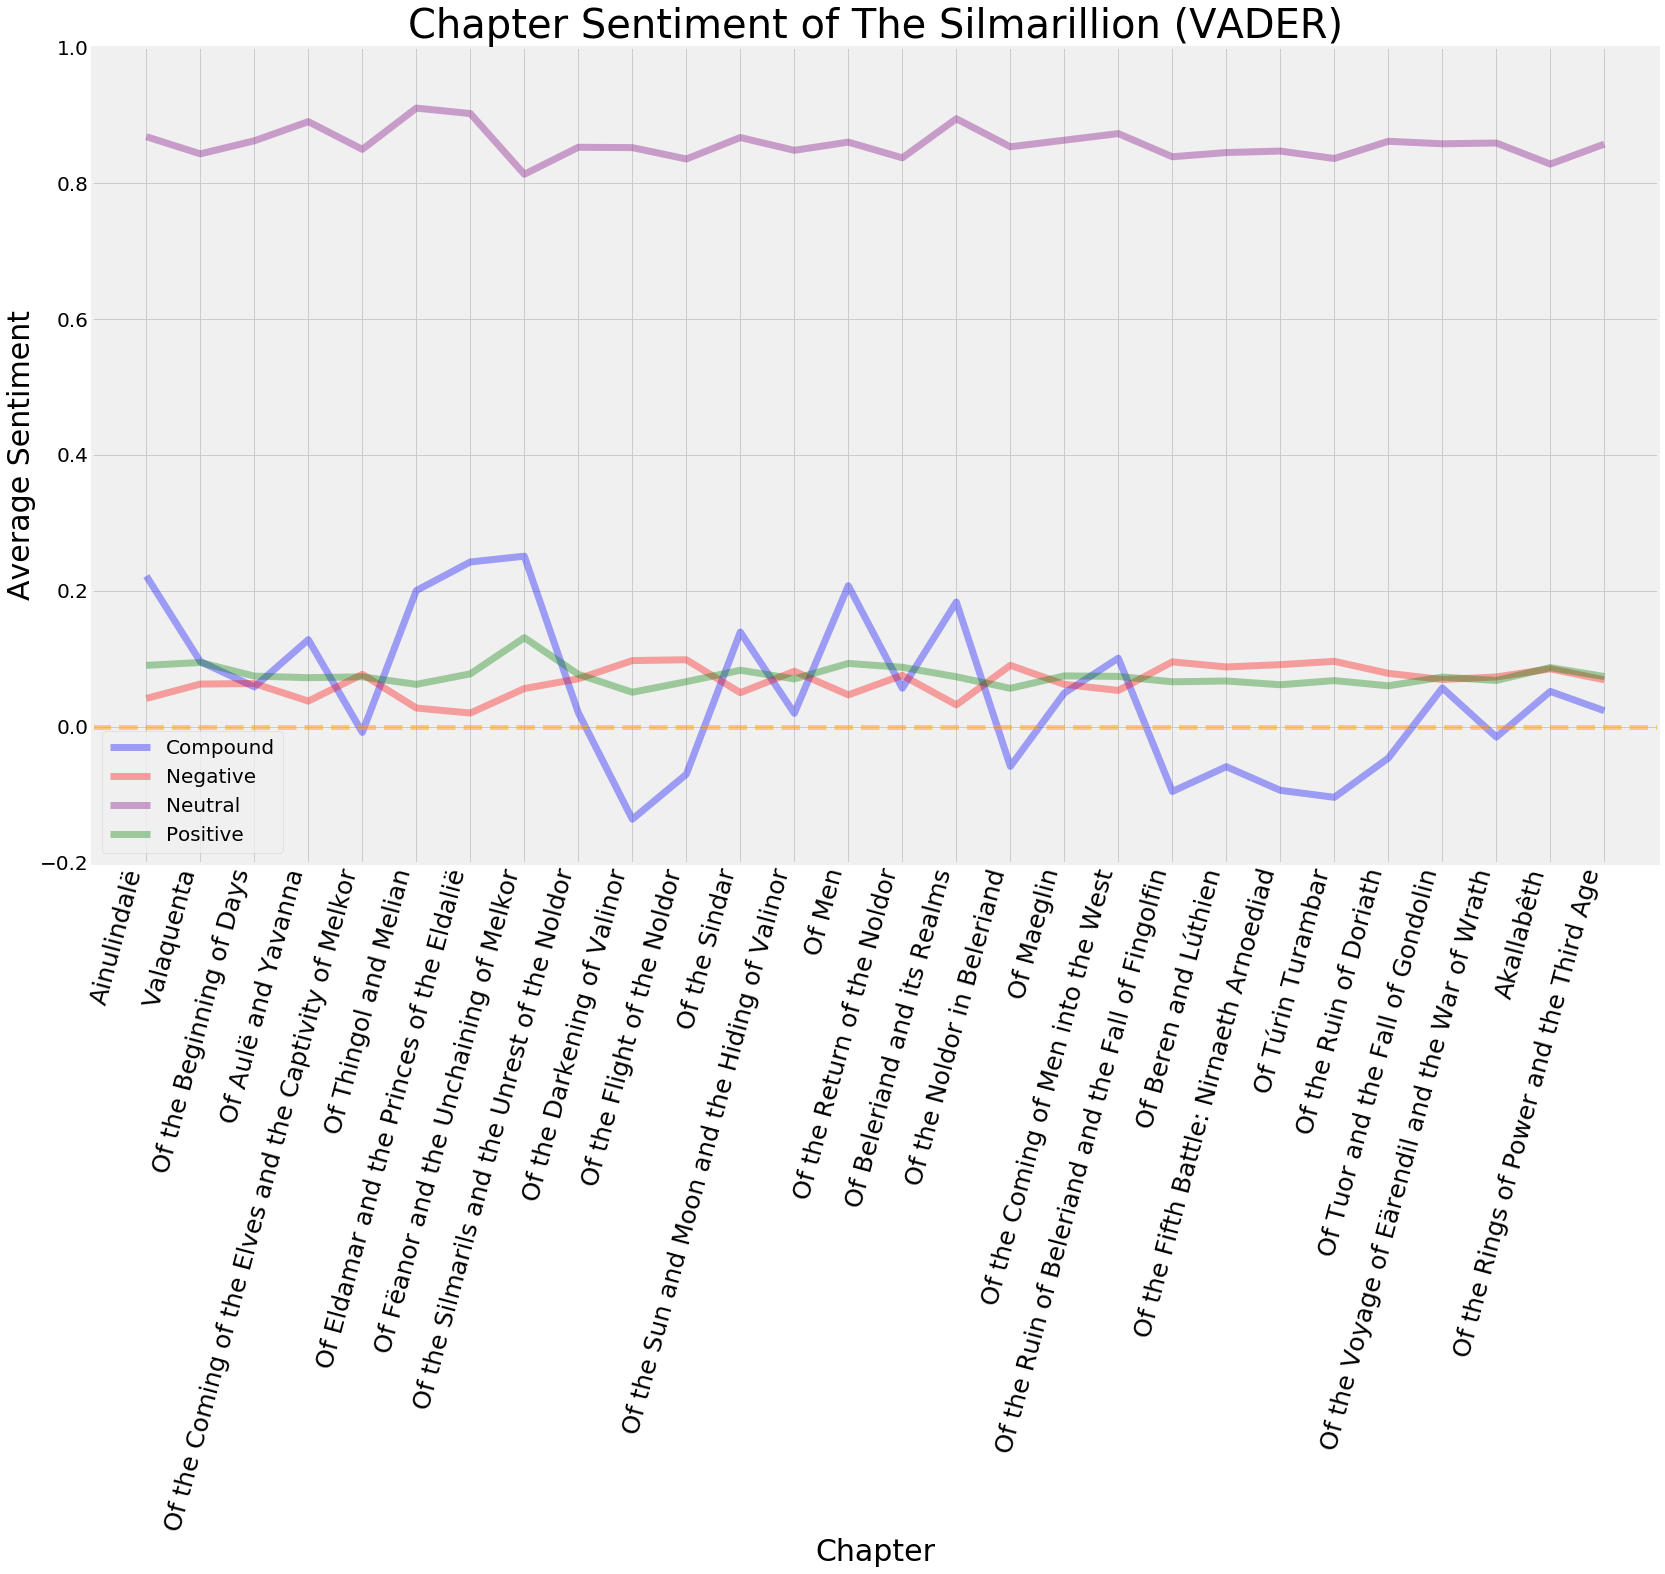

In [120]:
ax = plt.gca()
silmarillion_sentiments.plot(kind='line',x='Chapters', y='Compound',figsize=(25,15), color='blue',
                             alpha=.35, linewidth=7, ax=ax)
silmarillion_sentiments.plot(kind='line',x='Chapters', y='Negative',figsize=(25,15), color='red',
                             alpha=.35, linewidth=7, ax=ax)
silmarillion_sentiments.plot(kind='line',x='Chapters', y='Neutral',figsize=(25,15), color='purple',
                             alpha=.35, linewidth=7, ax=ax)
silmarillion_sentiments.plot(kind='line',x='Chapters', y='Positive',figsize=(25,15), color='green',
                             alpha=.35, linewidth=7, ax=ax)
plt.axhline(y=0, xmin=0, xmax=1, alpha=.5, color='orange', linestyle='--', linewidth=5)
plt.legend(loc='best', fontsize=20)
plt.title('Chapter Sentiment of The Silmarillion (VADER)', fontsize=40)
plt.xlim(-1,28)
plt.ylim(-.2,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(28), silmarillion_sentiments.Chapters[0:28], rotation=75, ha='right',fontsize=25)
plt.yticks([-0.2,0,0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.ylabel('Average Sentiment', fontsize=30)
#plt.show()

plt.savefig(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\The_Silmarillion\VADER_full.png',bbox_inches='tight')

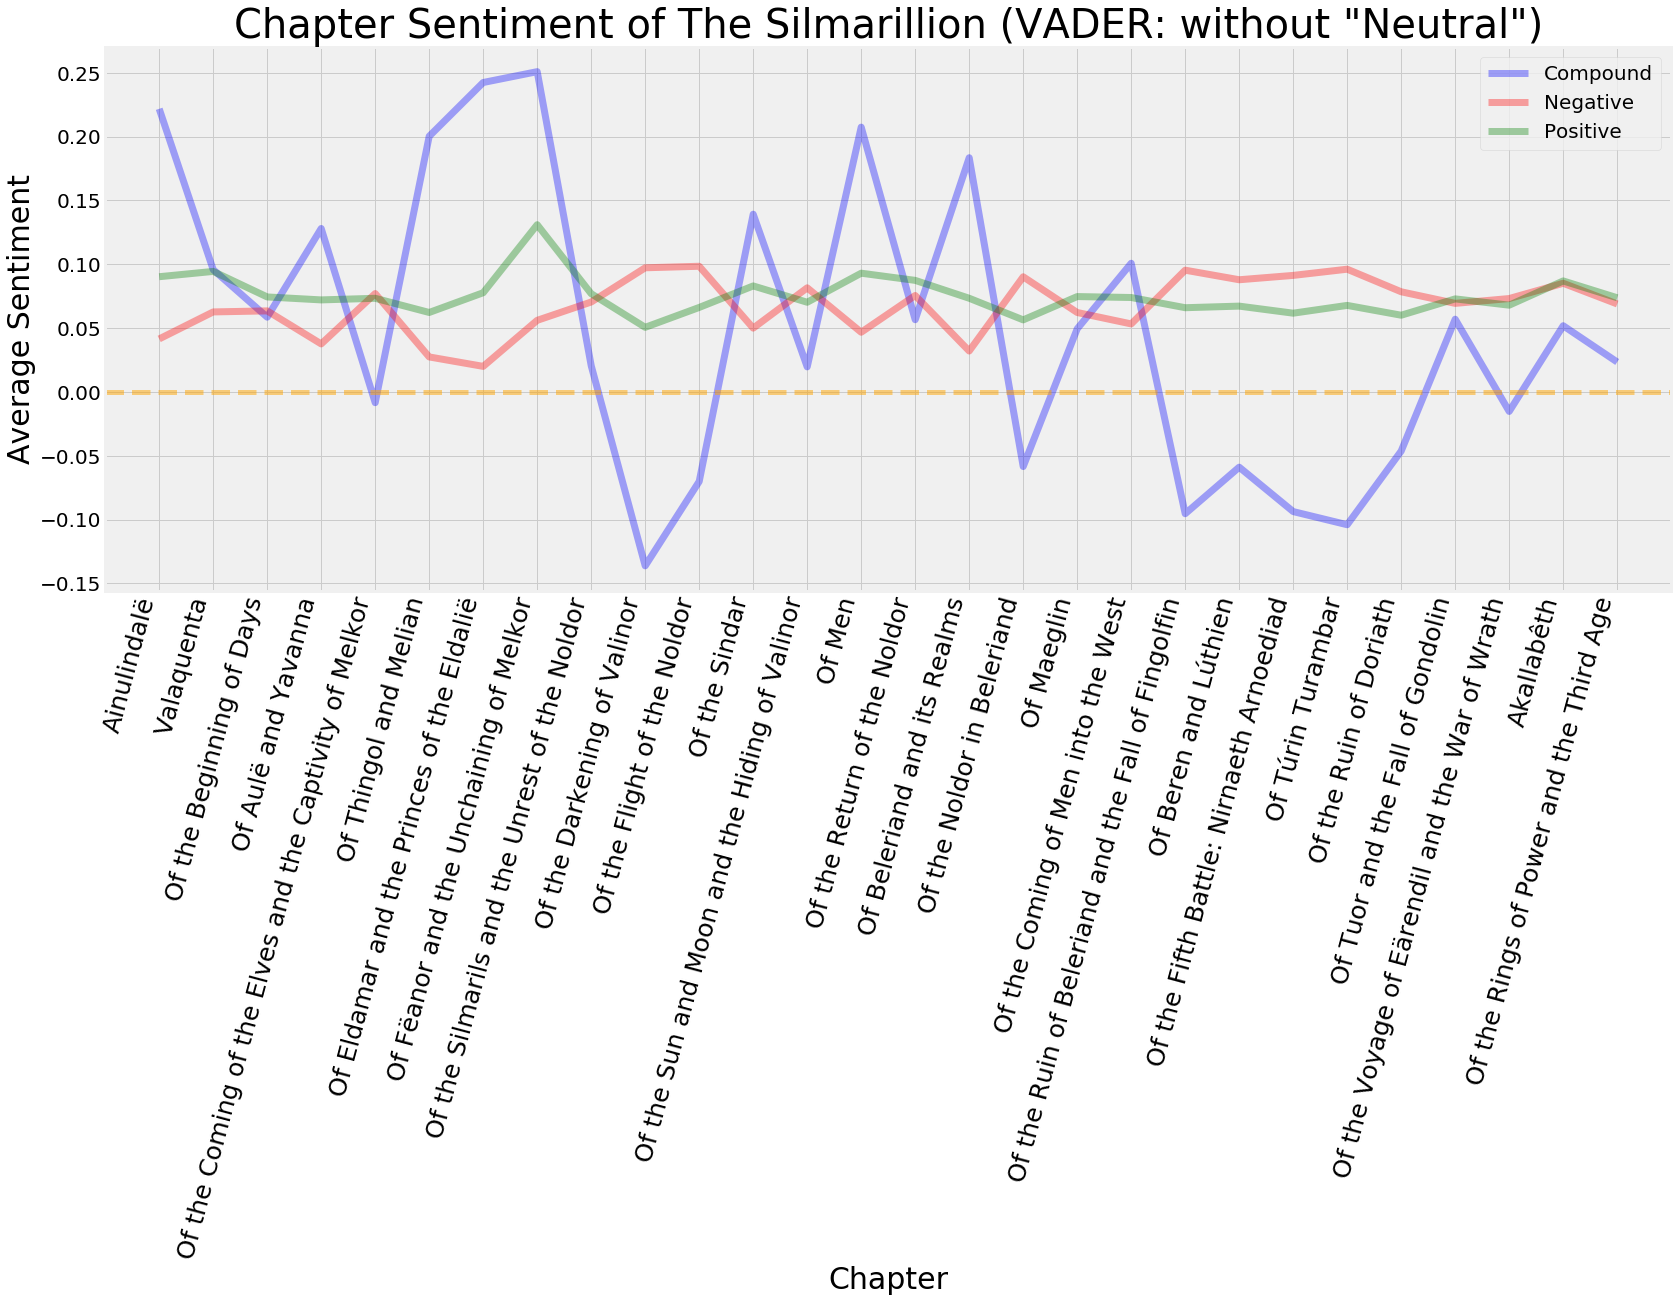

In [124]:
ax1 = plt.gca()
silmarillion_sentiments.plot(kind='line',x='Chapters', y='Compound',figsize=(25,10), color='blue',
                             alpha=.35, linewidth=7, ax=ax1)
silmarillion_sentiments.plot(kind='line',x='Chapters', y='Negative',figsize=(25,10), color='red',
                             alpha=.35, linewidth=7, ax=ax1)
silmarillion_sentiments.plot(kind='line',x='Chapters', y='Positive',figsize=(25,10), color='green',
                             alpha=.35, linewidth=7, ax=ax1)
plt.axhline(y=0, xmin=0, xmax=1, alpha=.5, color='orange', linestyle='--', linewidth=5)
plt.legend(loc='best', fontsize=20)
plt.title('Chapter Sentiment of The Silmarillion (VADER: without "Neutral")', fontsize=40)
plt.xlim(-1,28)
#plt.ylim(-.5,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(28), silmarillion_sentiments.Chapters[0:28], rotation=75, ha='right',fontsize=25)
plt.yticks([-0.15,-0.10,-0.05,0,0.05,0.10,0.15,0.20,0.25],fontsize=20)
plt.ylabel('Average Sentiment', fontsize=30)
#plt.show()

plt.savefig(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\The_Silmarillion\VADER_zoom.png',bbox_inches='tight')

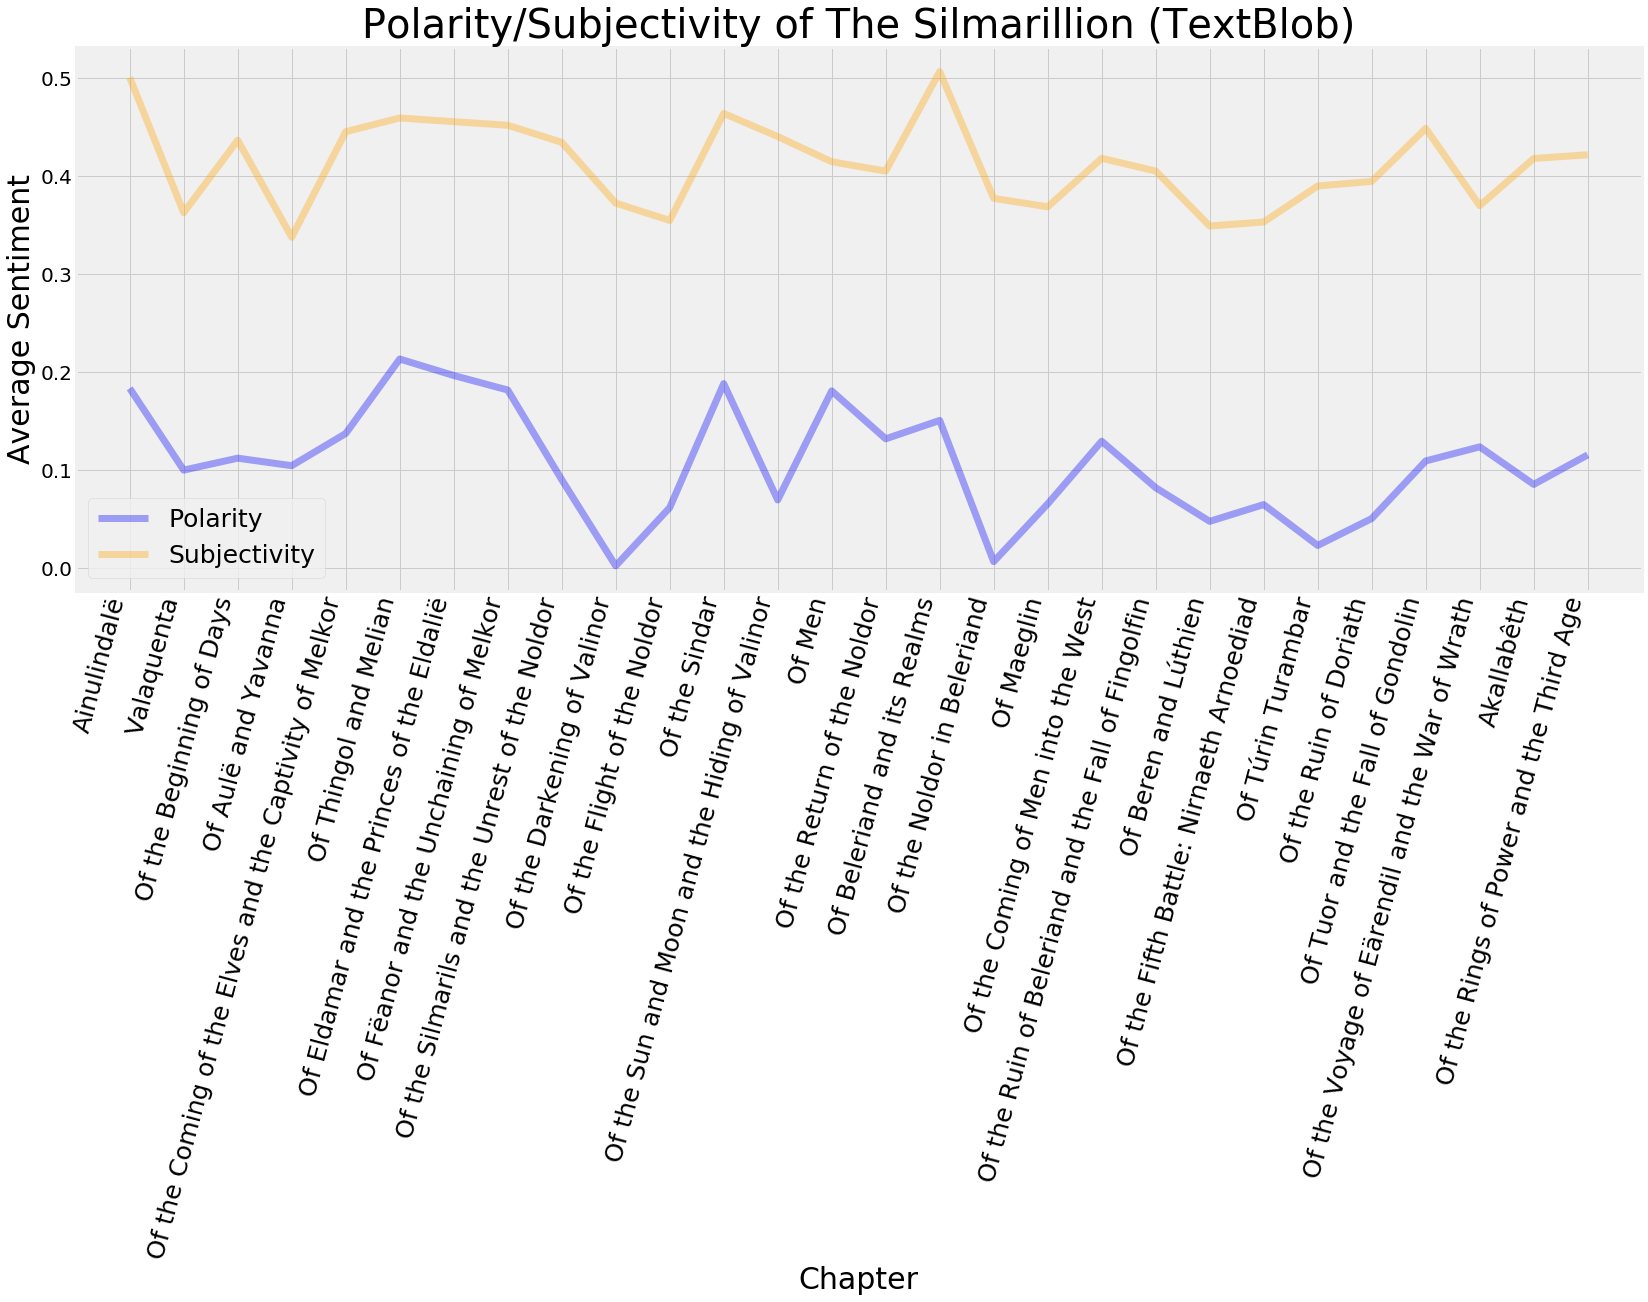

In [149]:
ax2 = plt.gca()
silmarillion_sentiments.plot(kind='line',x='Chapters', y='Polarity',figsize=(25,10), color='blue',
                             alpha=.35,linewidth=7, ax=ax2)
silmarillion_sentiments.plot(kind='line',x='Chapters', y='Subjectivity',figsize=(25,10), color='orange', 
                             alpha=.35, linewidth=7, ax=ax2)
plt.legend(loc='best', fontsize=25)
plt.title('Polarity/Subjectivity of The Silmarillion (TextBlob)', fontsize=40)
plt.xlim(-1,28)
#plt.ylim(-.5,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(28), silmarillion_sentiments.Chapters[0:28], rotation=75, ha='right',fontsize=25)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5],fontsize=20)
plt.ylabel('Average Sentiment', fontsize=30)
#plt.show()

plt.savefig(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\The_Silmarillion\TextBlob_polarity.png',bbox_inches='tight')

Text(0, 0.5, 'Sentiment Score')

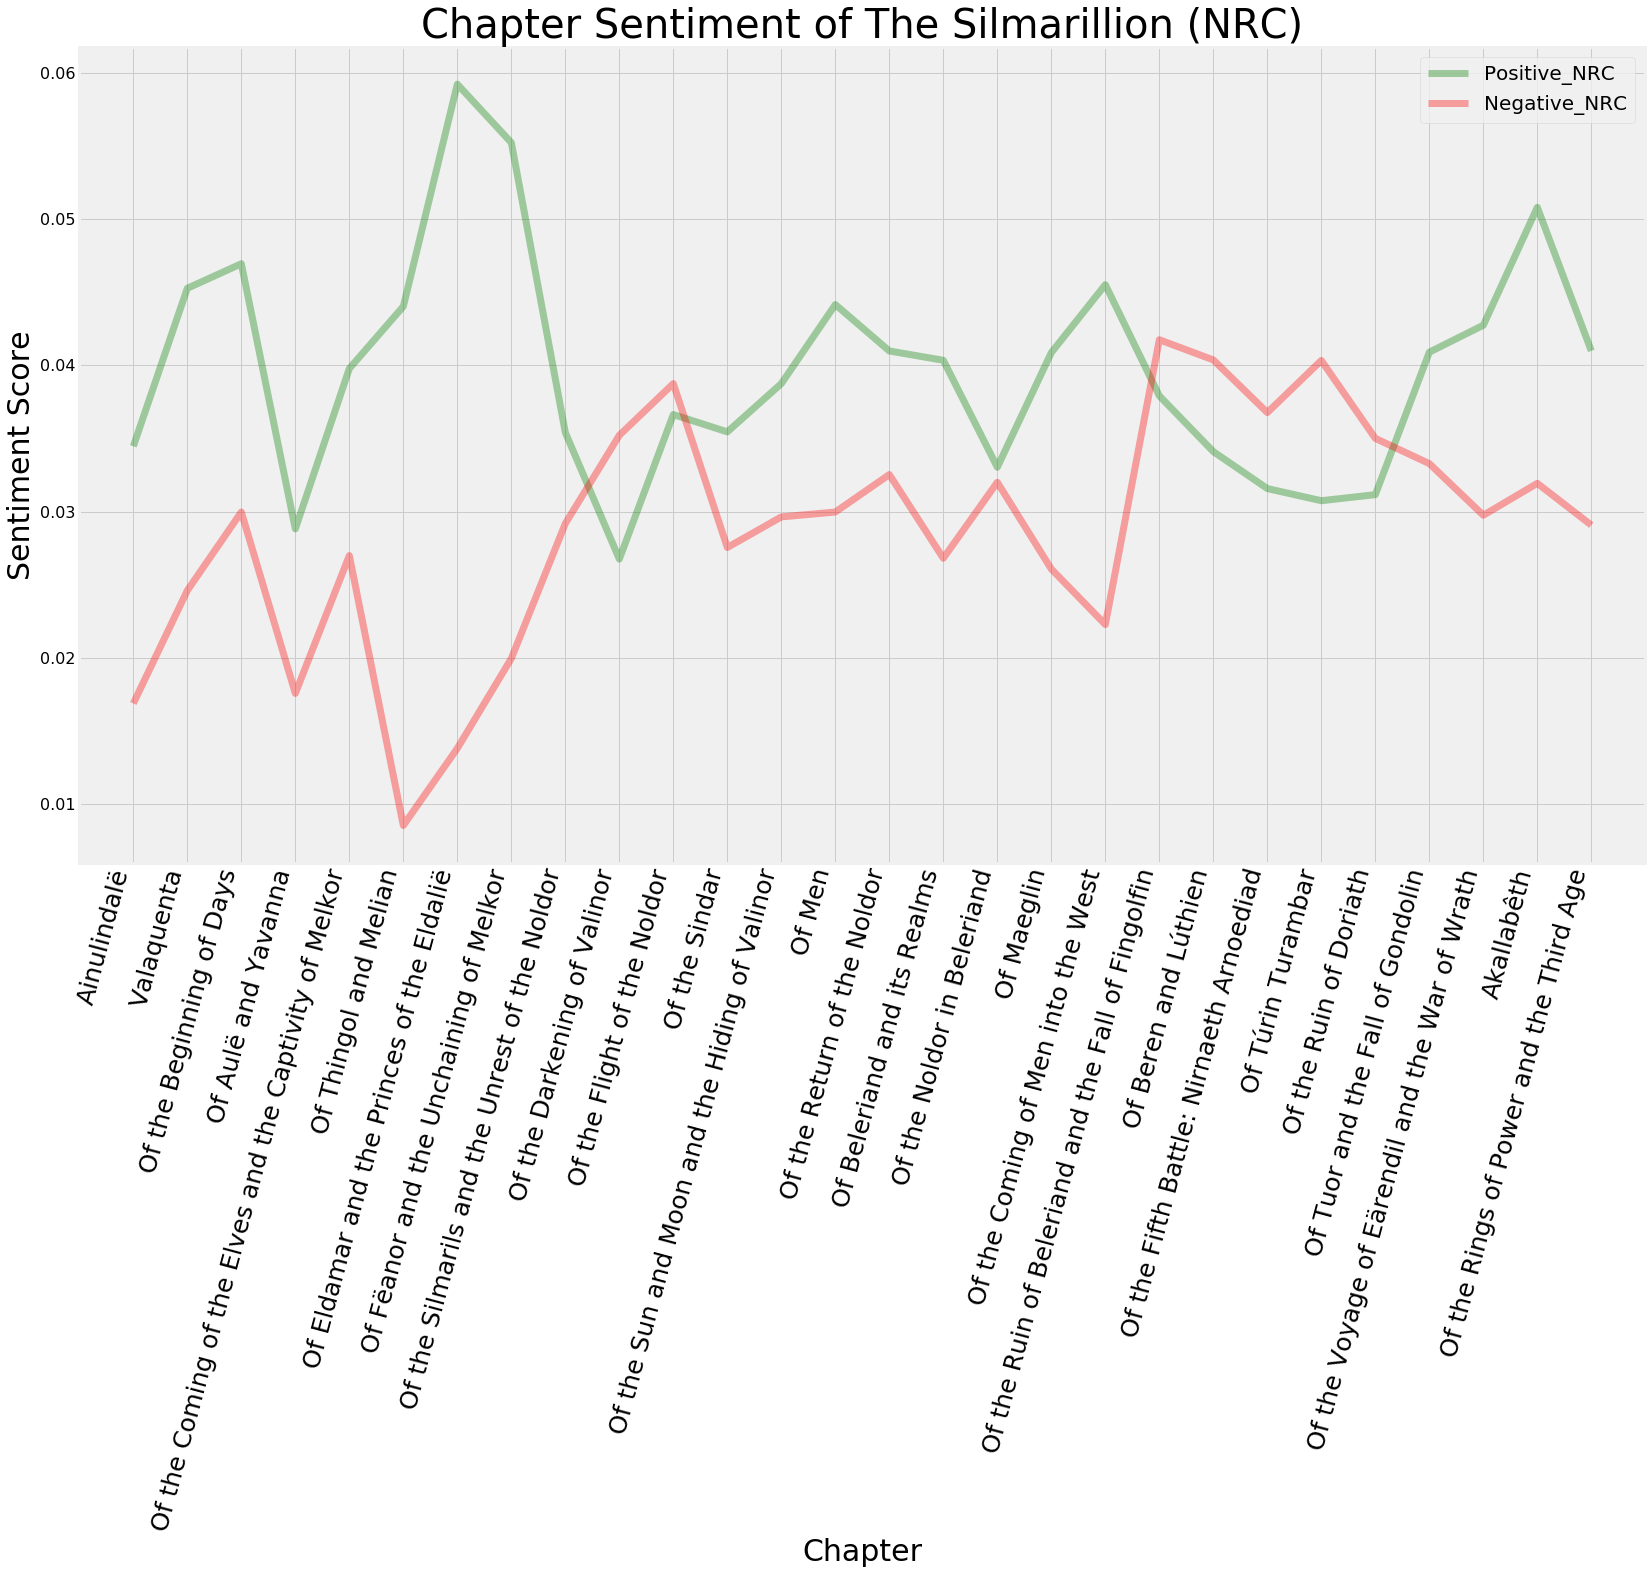

In [153]:
ax = plt.gca()
silmarillion_sentiments.plot(kind='line',x='Chapters', y='Positive_NRC',figsize=(25,15), color='green',
                             alpha=.35, linewidth=7, ax=ax)
silmarillion_sentiments.plot(kind='line',x='Chapters', y='Negative_NRC',figsize=(25,15), color='red',
                             alpha=.35, linewidth=7, ax=ax)
plt.legend(loc='best', fontsize=20)
plt.title('Chapter Sentiment of The Silmarillion (NRC)', fontsize=40)
plt.xlim(-1,28)
#plt.ylim(-.2,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(28), silmarillion_sentiments.Chapters[0:28], rotation=75, ha='right',fontsize=25)
plt.yticks(fontsize=16)
plt.ylabel('Sentiment Score', fontsize=30)
#plt.show()

Text(0, 0.5, 'Sentiment Score')

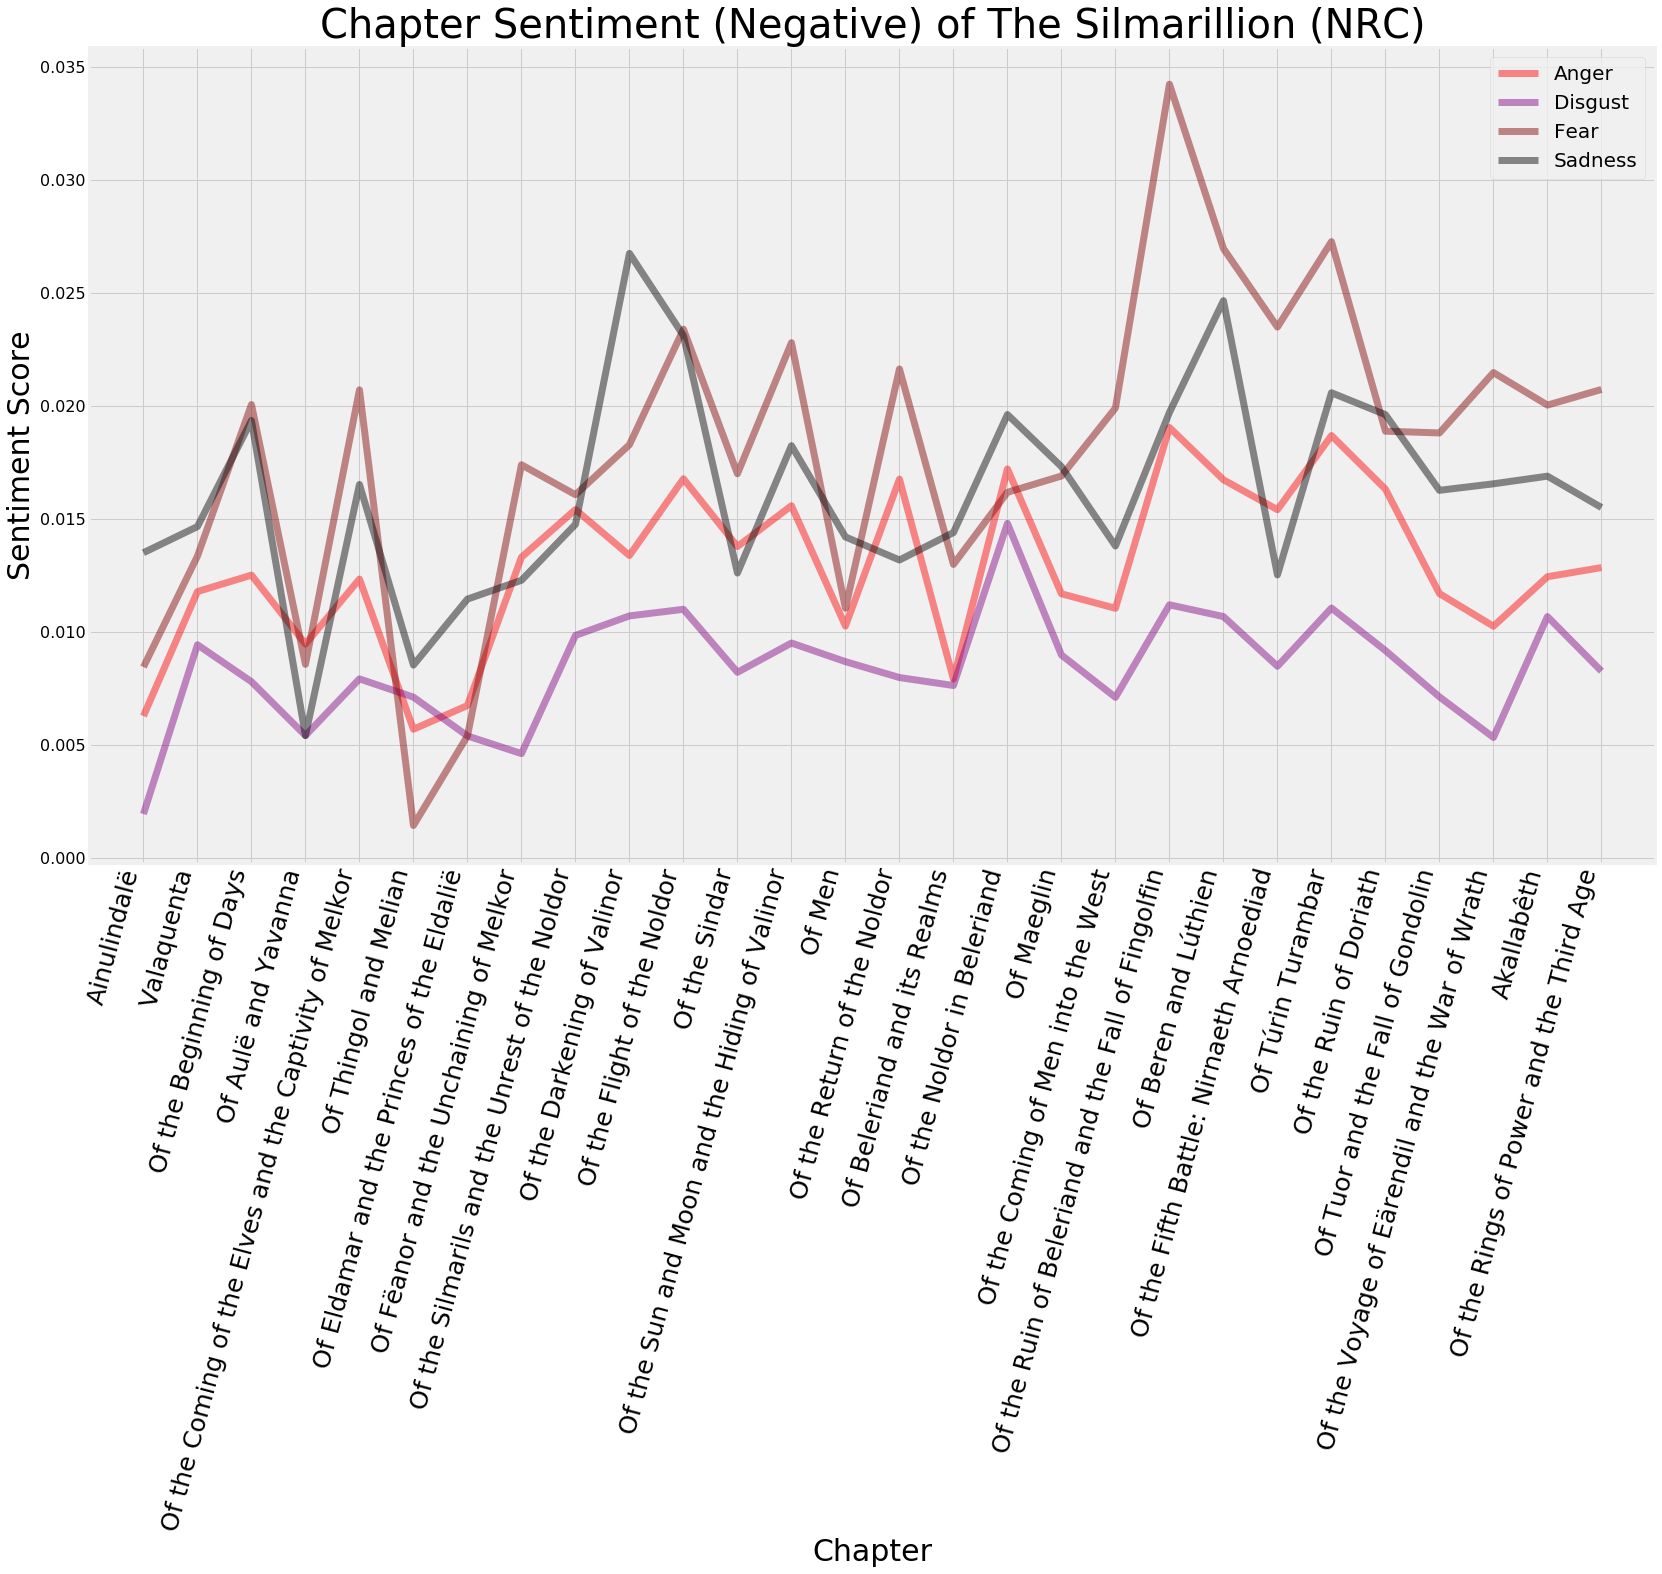

In [174]:
ax = plt.gca()
silmarillion_sentiments.plot(kind='line',x='Chapters', y='Anger',figsize=(25,15), color='red',
                             alpha=.45, linewidth=7, ax=ax)
silmarillion_sentiments.plot(kind='line',x='Chapters', y='Disgust',figsize=(25,15), color='purple',
                             alpha=.45, linewidth=7, ax=ax)
silmarillion_sentiments.plot(kind='line',x='Chapters', y='Fear',figsize=(25,15), color='maroon',
                             alpha=.45, linewidth=7, ax=ax)
silmarillion_sentiments.plot(kind='line',x='Chapters', y='Sadness',figsize=(25,15), color='black',
                             alpha=.45, linewidth=7, ax=ax)
plt.legend(loc='best', fontsize=20)
plt.title('Chapter Sentiment (Negative) of The Silmarillion (NRC)', fontsize=40)
plt.xlim(-1,28)
#plt.ylim(-.2,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(28), silmarillion_sentiments.Chapters[0:28], rotation=75, ha='right',fontsize=25)
plt.yticks(fontsize=16)
plt.ylabel('Sentiment Score', fontsize=30)
#plt.show()

Text(0, 0.5, 'Sentiment Score')

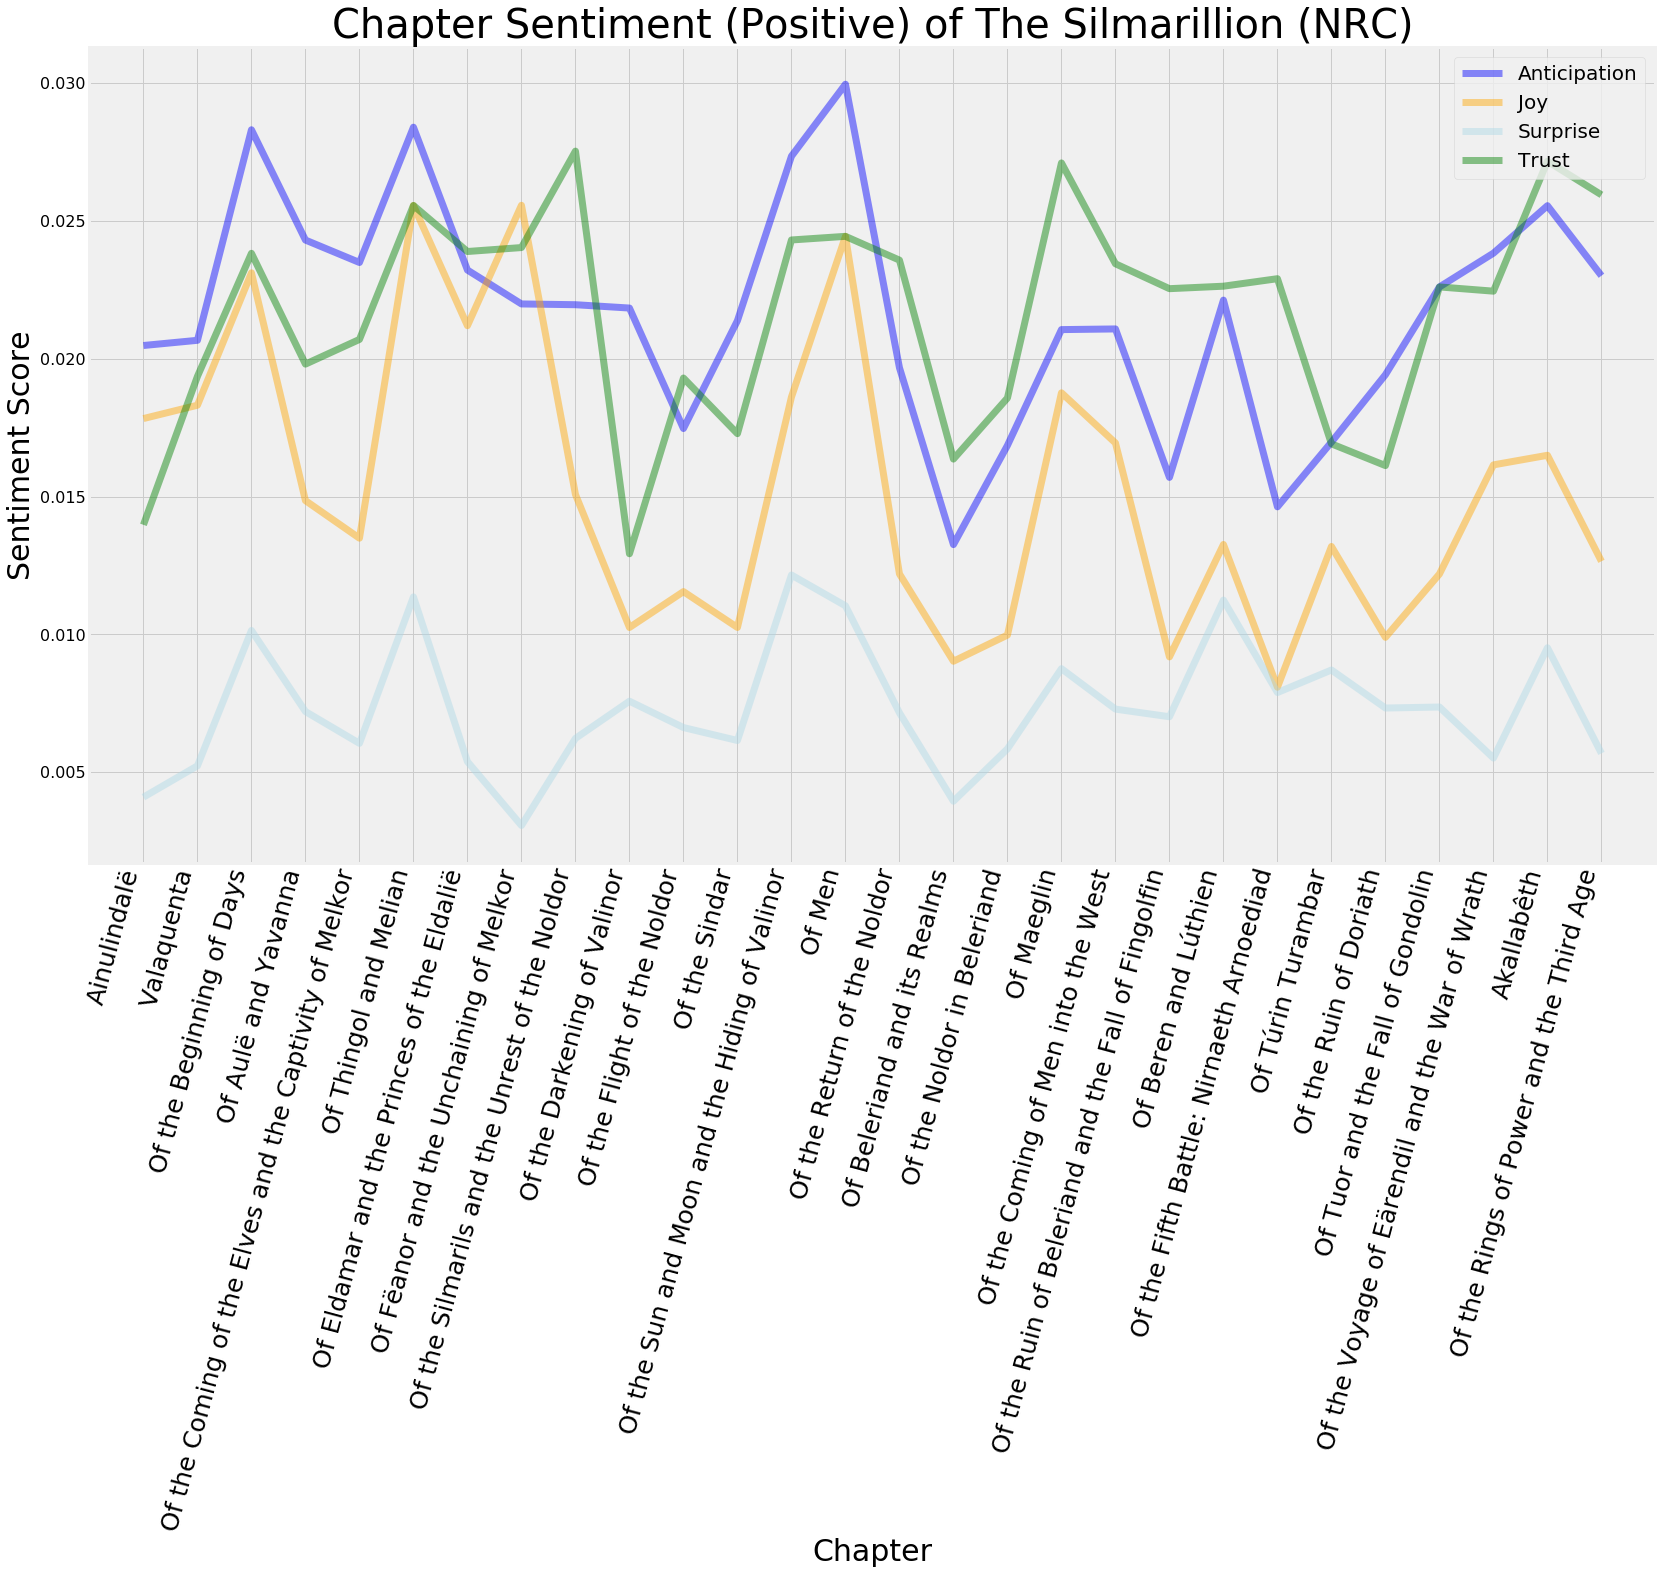

In [178]:
ax = plt.gca()
silmarillion_sentiments.plot(kind='line',x='Chapters', y='Anticipation',figsize=(25,15), color='blue',
                             alpha=.45, linewidth=7, ax=ax)
silmarillion_sentiments.plot(kind='line',x='Chapters', y='Joy',figsize=(25,15), color='orange',
                             alpha=.45, linewidth=7, ax=ax)
silmarillion_sentiments.plot(kind='line',x='Chapters', y='Surprise',figsize=(25,15), color='lightblue',
                             alpha=.45, linewidth=7, ax=ax)
silmarillion_sentiments.plot(kind='line',x='Chapters', y='Trust',figsize=(25,15), color='green',
                             alpha=.45, linewidth=7, ax=ax)
plt.legend(loc='best', fontsize=20)
plt.title('Chapter Sentiment (Positive) of The Silmarillion (NRC)', fontsize=40)
plt.xlim(-1,28)
#plt.ylim(-.2,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(28), silmarillion_sentiments.Chapters[0:28], rotation=75, ha='right',fontsize=25)
plt.yticks(fontsize=16)
plt.ylabel('Sentiment Score', fontsize=30)
#plt.show()

Text(0, 0.5, 'Sentiment Score')

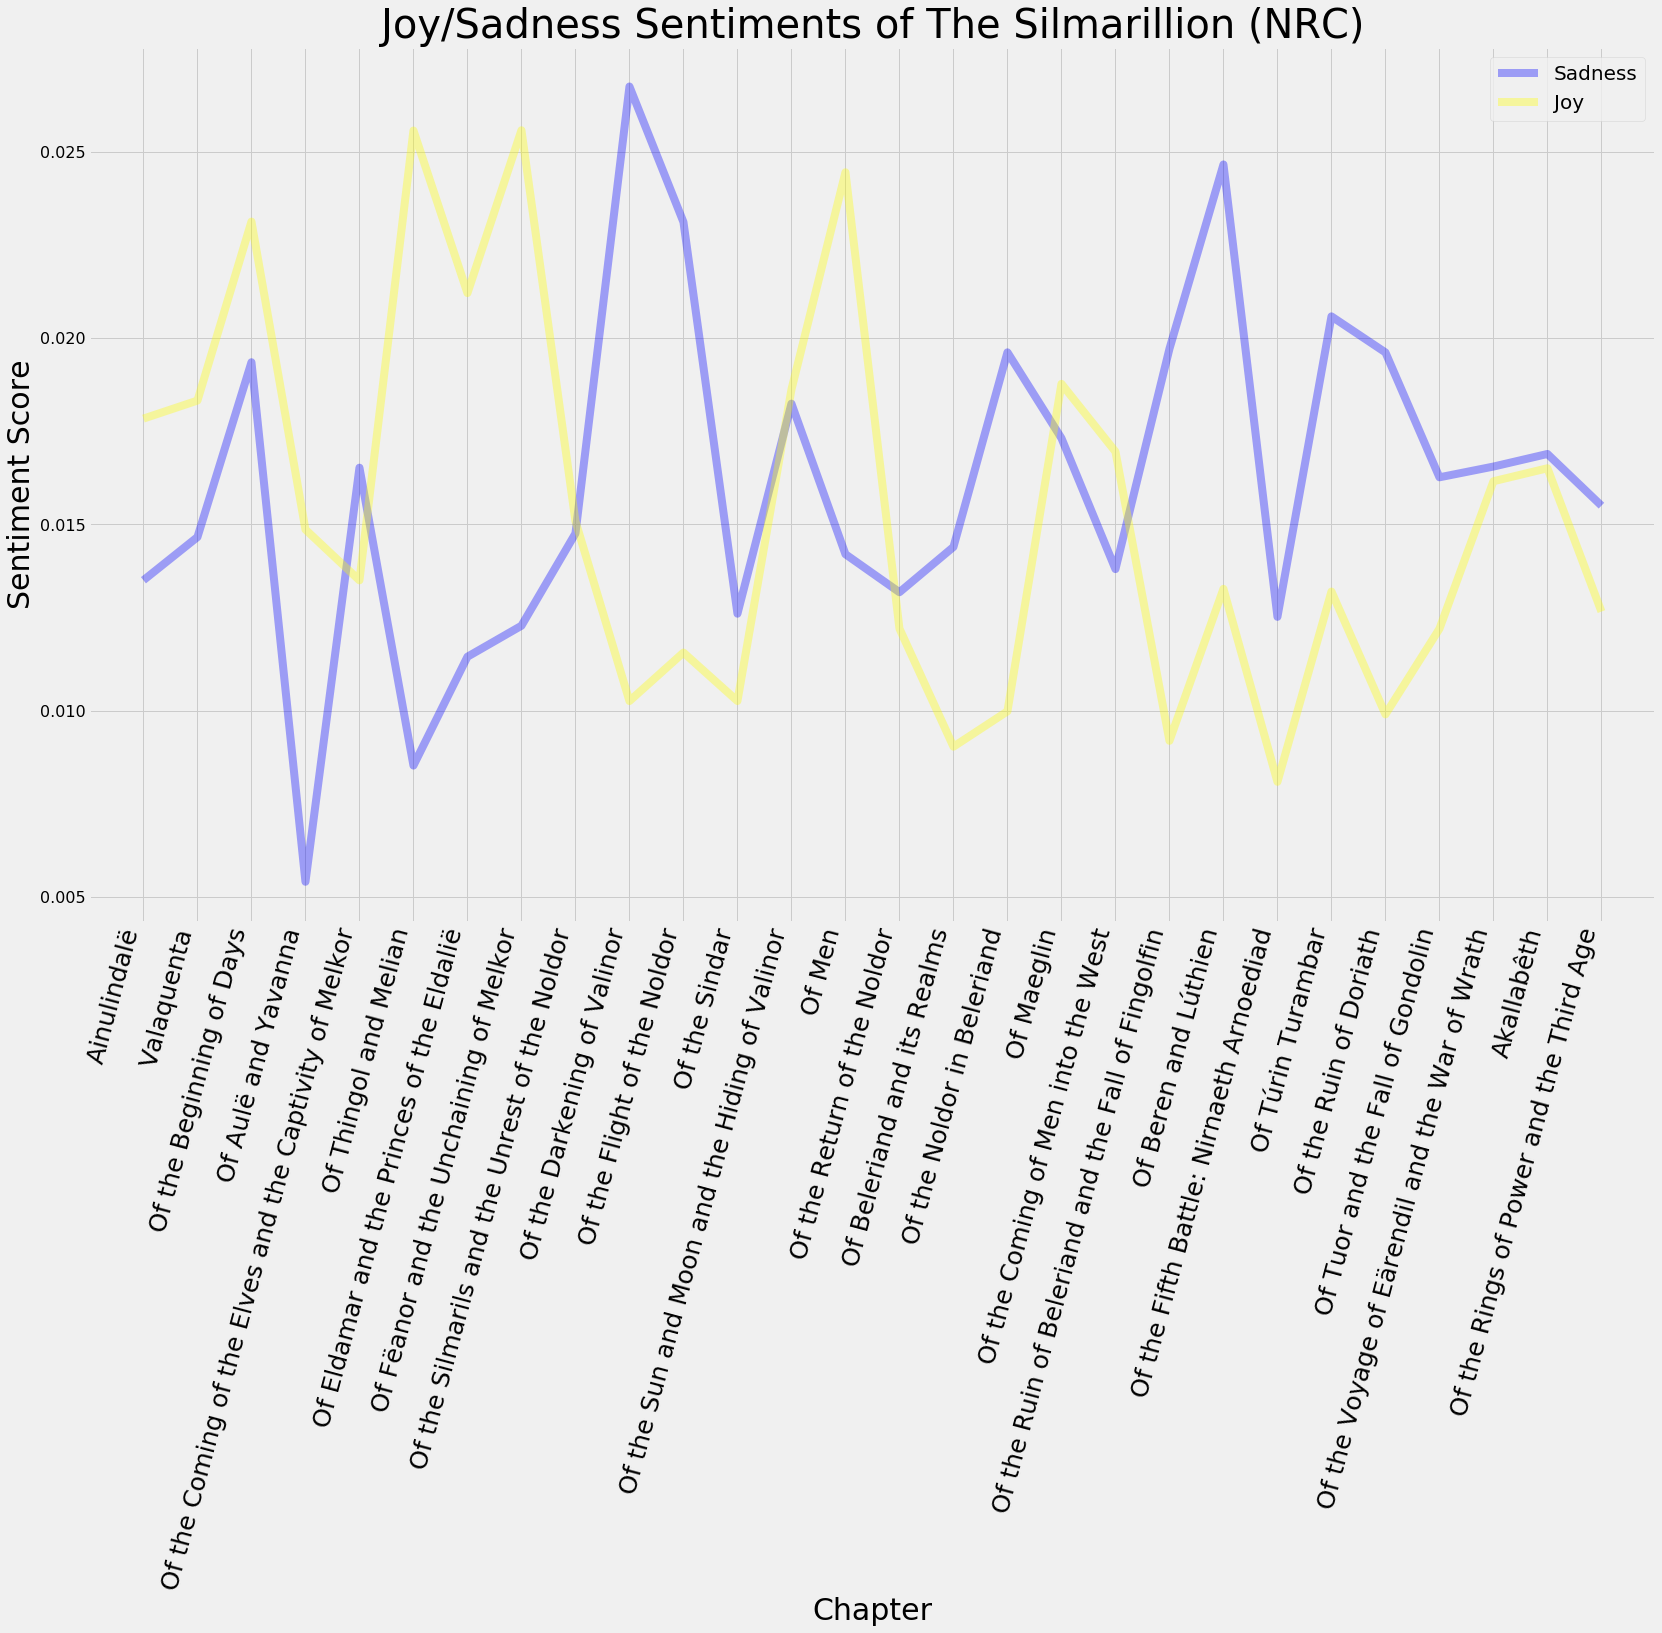

In [197]:
ax = plt.gca()
silmarillion_sentiments.plot(kind='line',x='Chapters', y='Sadness',figsize=(25,15), color='blue',
                             alpha=.35, linewidth=8, ax=ax)
silmarillion_sentiments.plot(kind='line',x='Chapters', y='Joy',figsize=(25,15), color='yellow',
                             alpha=.35, linewidth=8, ax=ax)
plt.legend(loc='best', fontsize=20)
plt.title('Joy/Sadness Sentiments of The Silmarillion (NRC)', fontsize=40)
plt.xlim(-1,28)
#plt.ylim(-.2,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(28), silmarillion_sentiments.Chapters[0:28], rotation=75, ha='right',fontsize=25)
plt.yticks(fontsize=16)
plt.ylabel('Sentiment Score', fontsize=30)
#plt.show()

Text(0, 0.5, 'Sentiment Score')

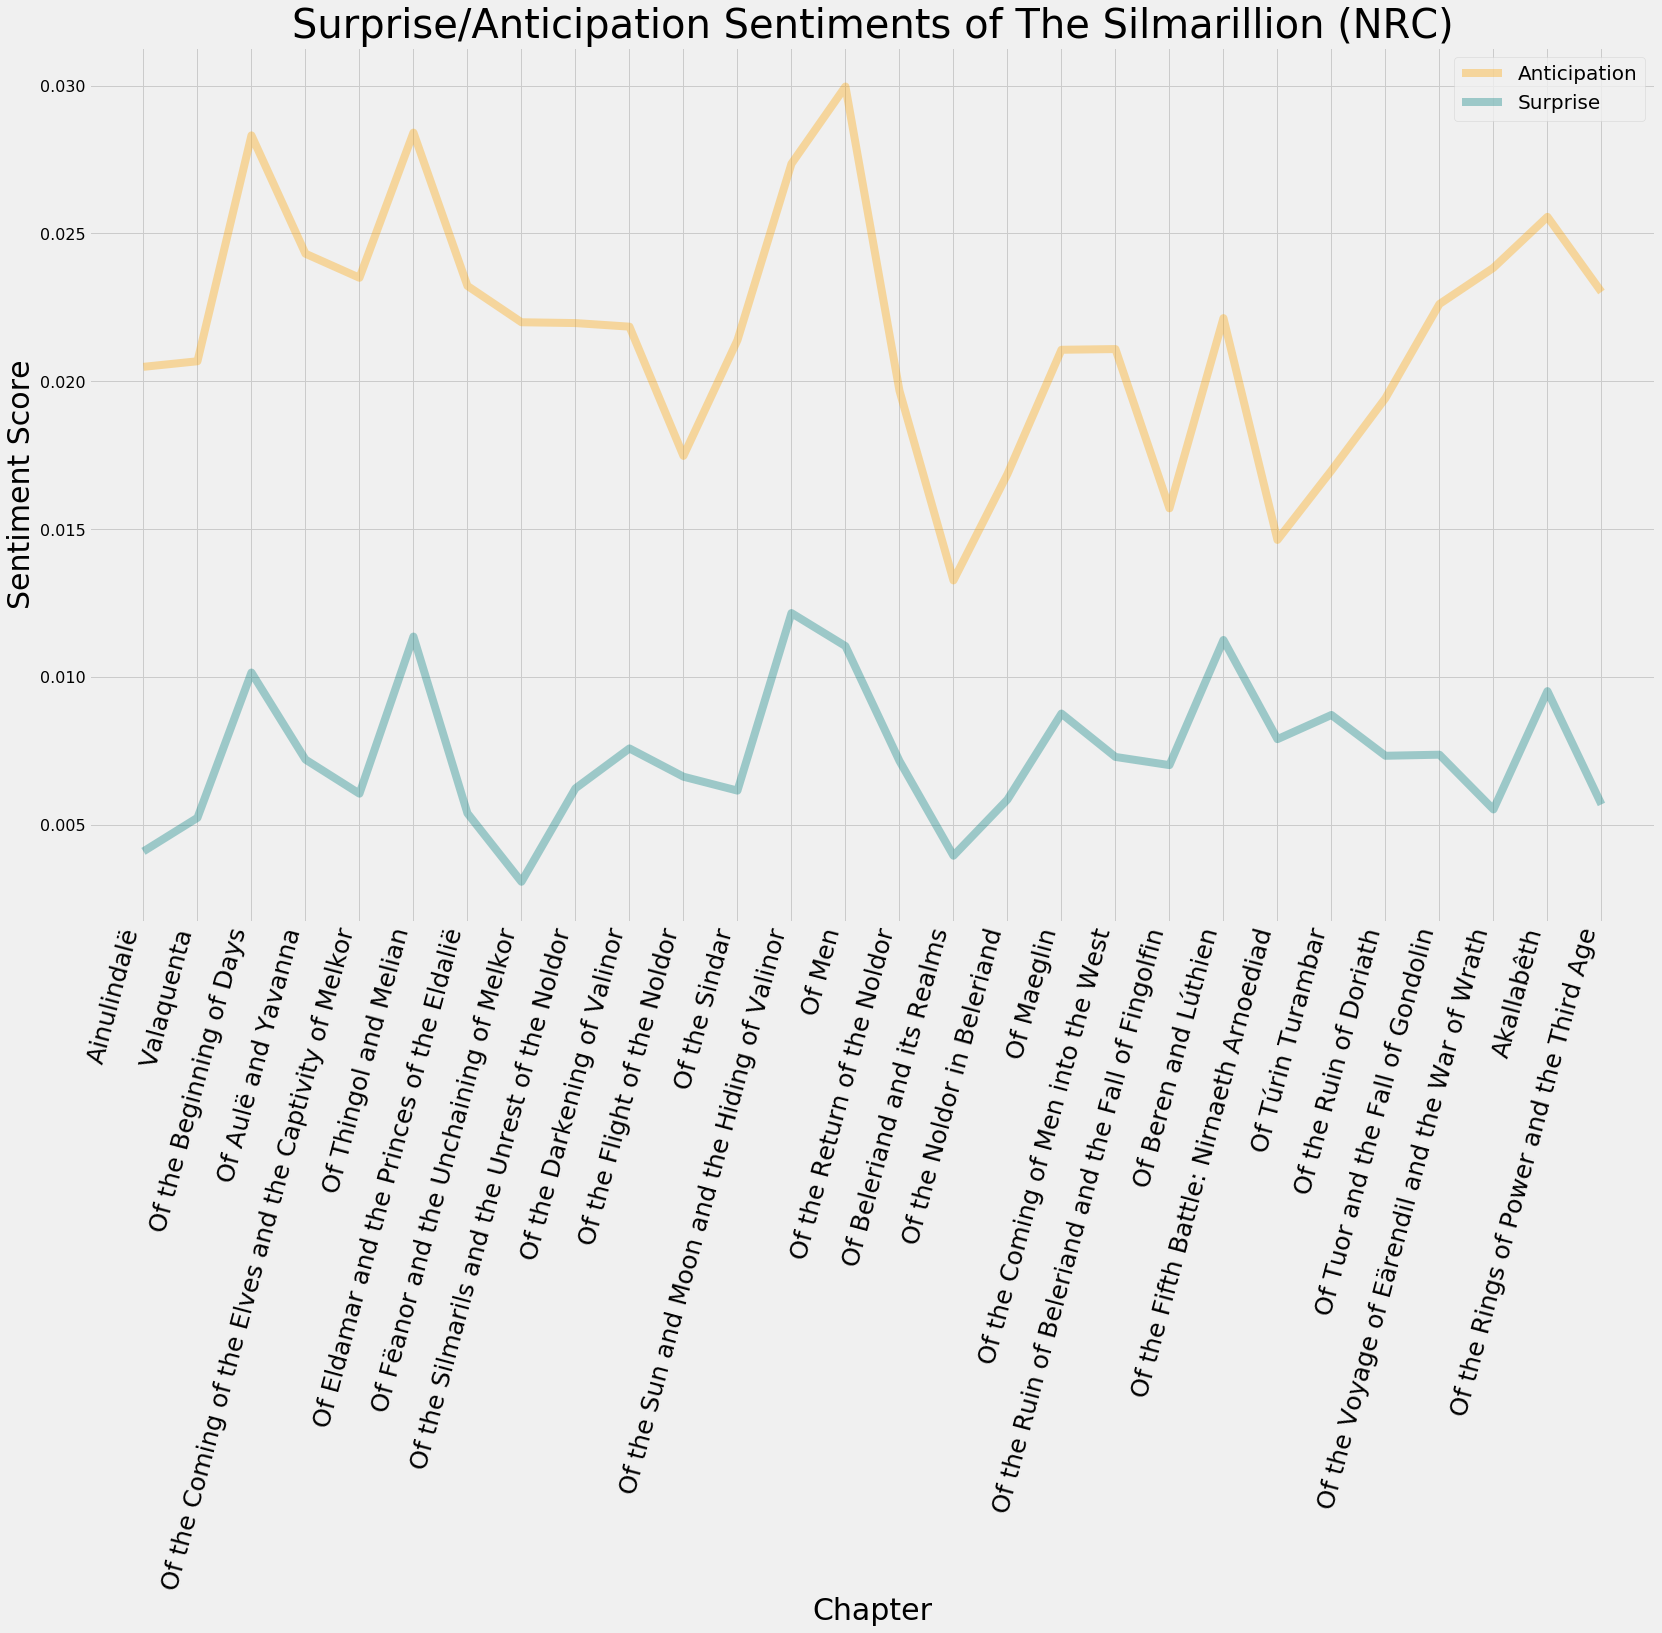

In [196]:
ax = plt.gca()
silmarillion_sentiments.plot(kind='line',x='Chapters', y='Anticipation',figsize=(25,15), color='orange',
                             alpha=.35, linewidth=8, ax=ax)
silmarillion_sentiments.plot(kind='line',x='Chapters', y='Surprise',figsize=(25,15), color='teal',
                             alpha=.35, linewidth=8, ax=ax)
plt.legend(loc='best', fontsize=20)
plt.title('Surprise/Anticipation Sentiments of The Silmarillion (NRC)', fontsize=40)
plt.xlim(-1,28)
#plt.ylim(-.2,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(28), silmarillion_sentiments.Chapters[0:28], rotation=75, ha='right',fontsize=25)
plt.yticks(fontsize=16)
plt.ylabel('Sentiment Score', fontsize=30)
#plt.show()

Text(0, 0.5, 'Sentiment Score')

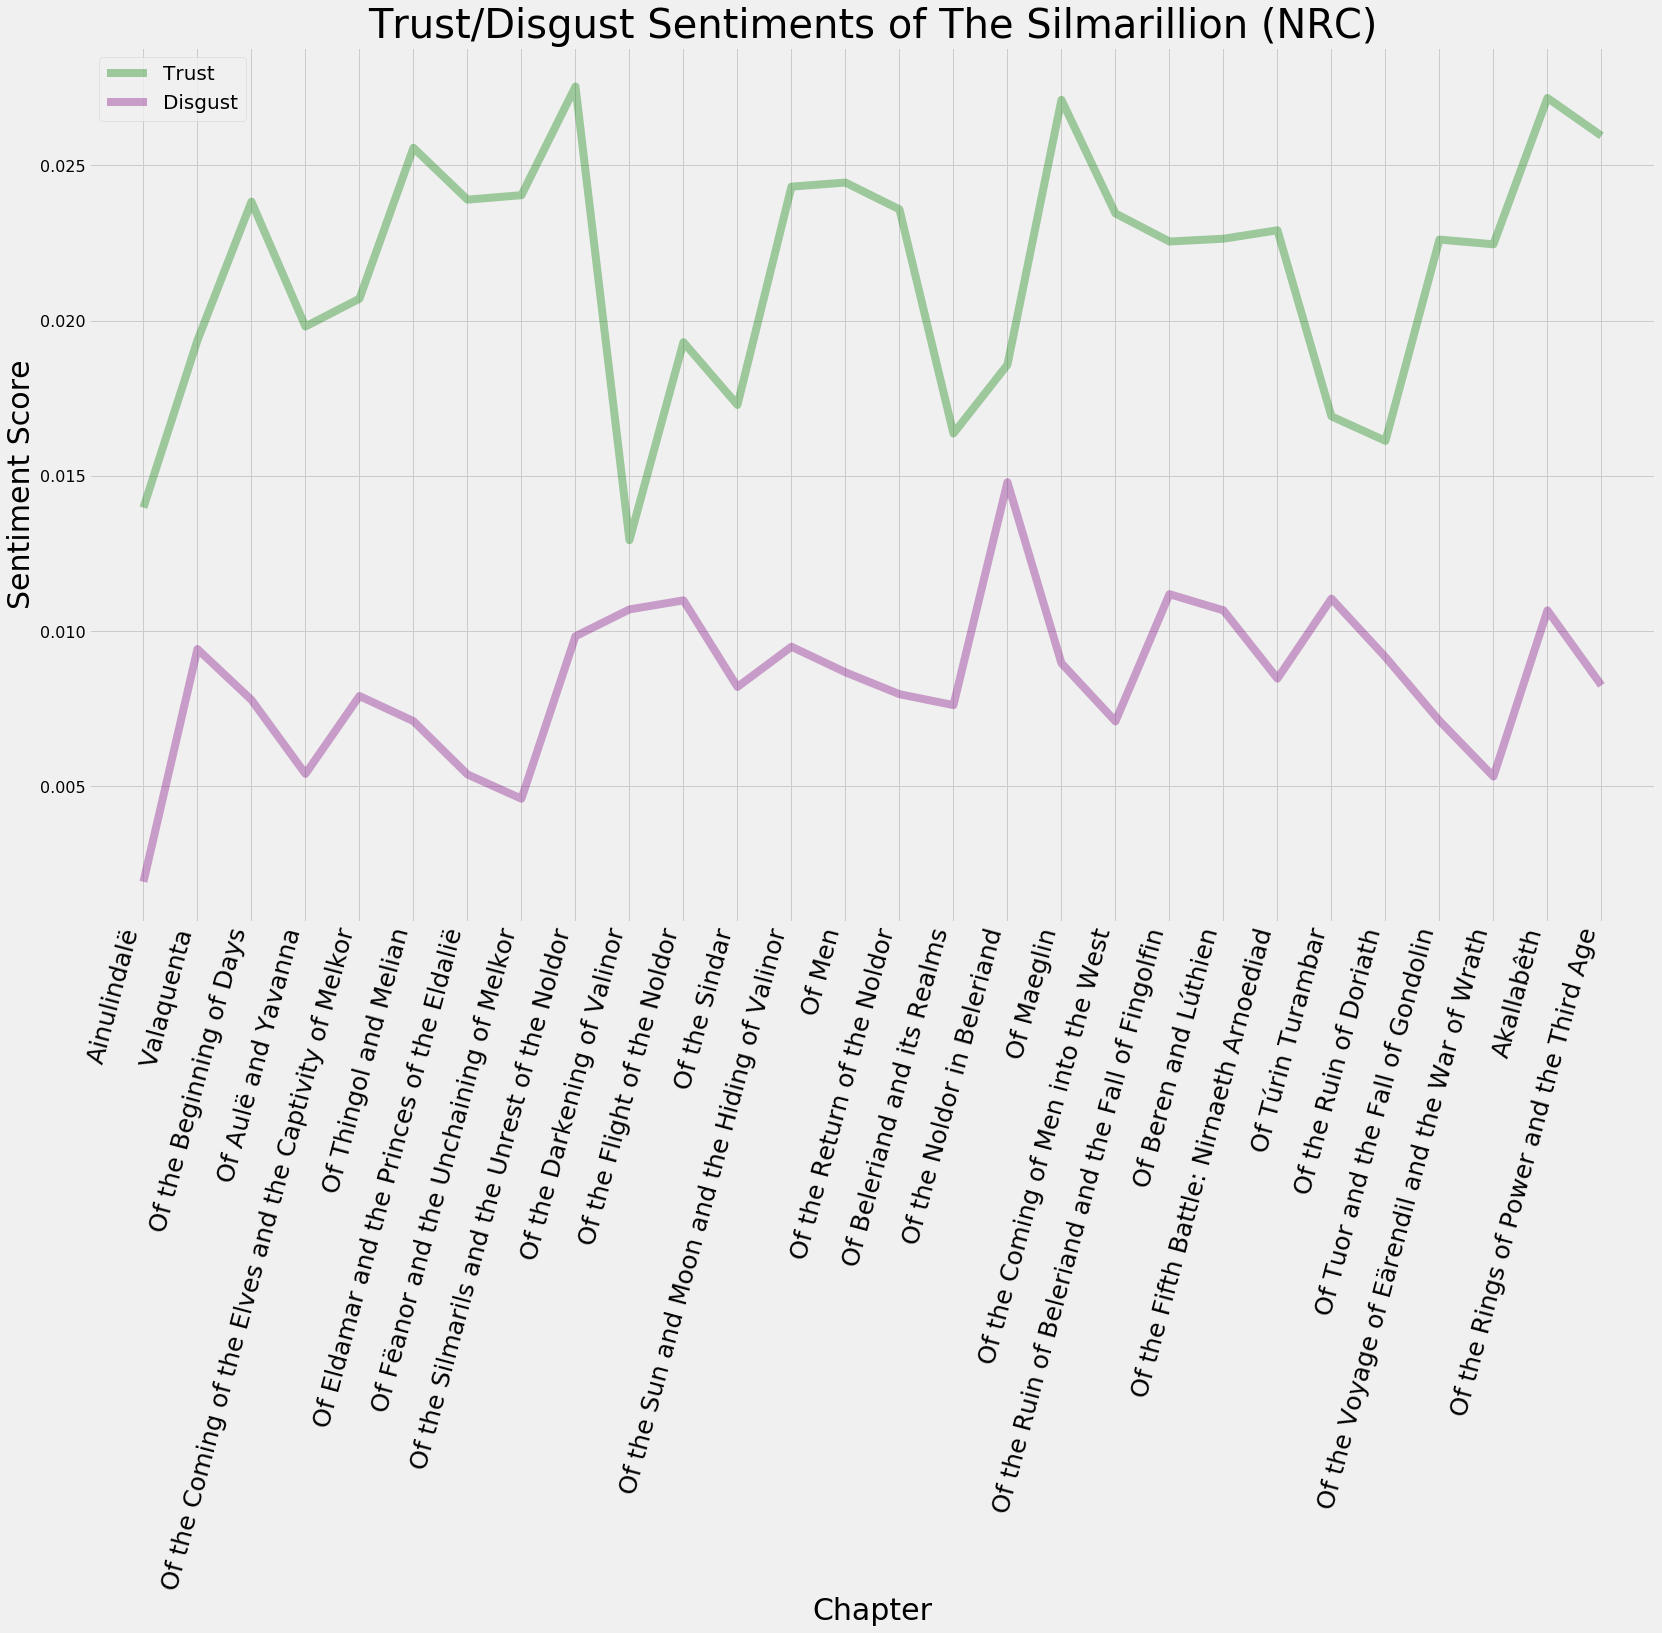

In [195]:
ax = plt.gca()
silmarillion_sentiments.plot(kind='line',x='Chapters', y='Trust',figsize=(25,15), color='green',
                             alpha=.35, linewidth=8, ax=ax)
silmarillion_sentiments.plot(kind='line',x='Chapters', y='Disgust',figsize=(25,15), color='purple',
                             alpha=.35, linewidth=8, ax=ax)
plt.legend(loc='best', fontsize=20)
plt.title('Trust/Disgust Sentiments of The Silmarillion (NRC)', fontsize=40)
plt.xlim(-1,28)
#plt.ylim(-.2,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(28), silmarillion_sentiments.Chapters[0:28], rotation=75, ha='right',fontsize=25)
plt.yticks(fontsize=16)
plt.ylabel('Sentiment Score', fontsize=30)
#plt.show()

Text(0, 0.5, 'Sentiment Score')

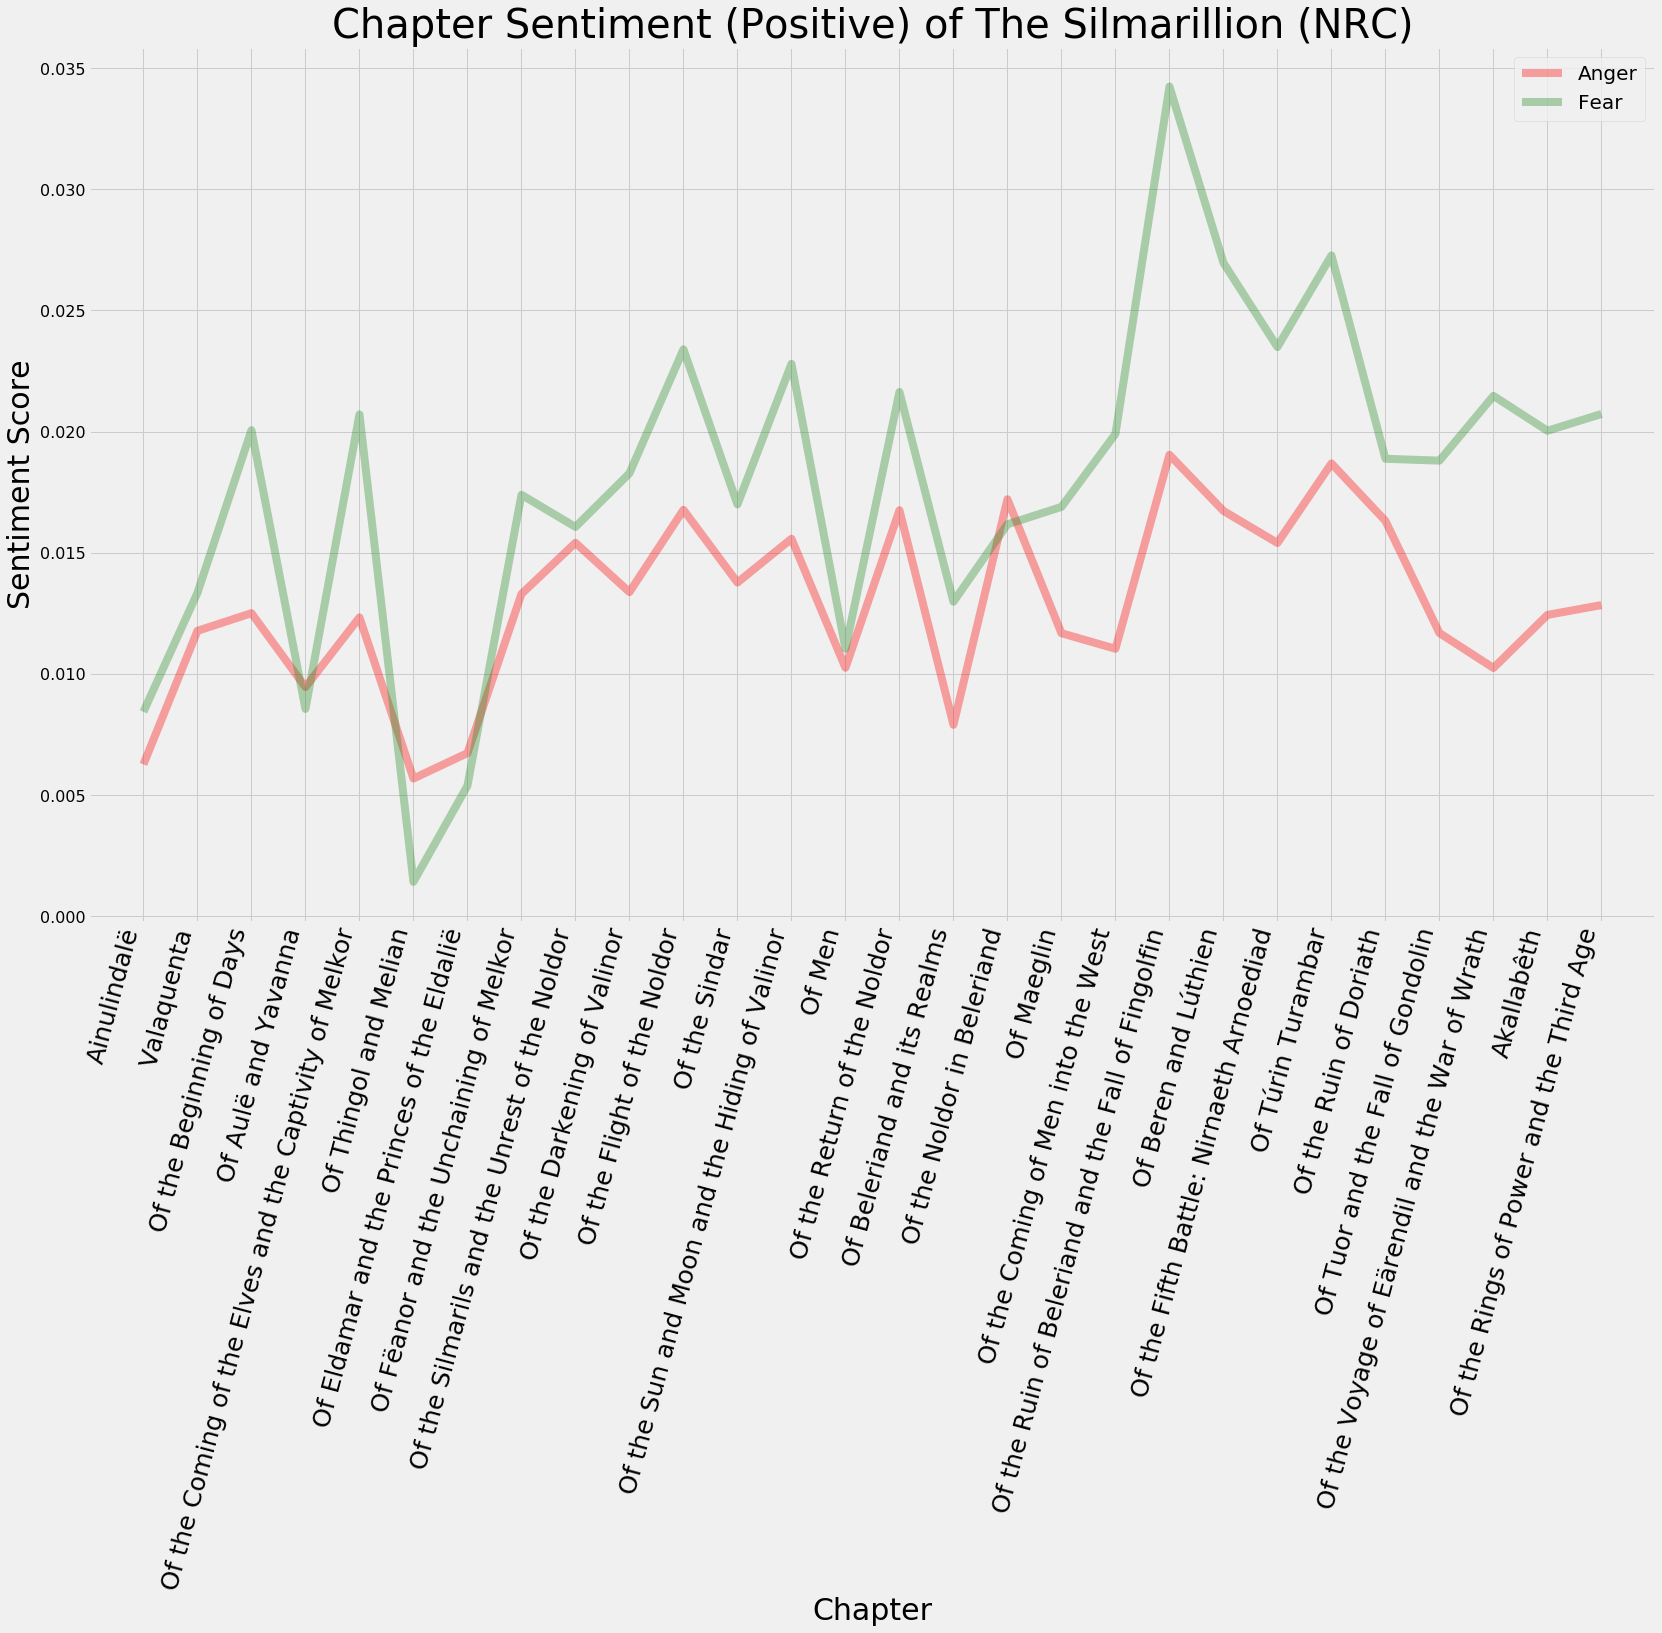

In [192]:
ax = plt.gca()
silmarillion_sentiments.plot(kind='line',x='Chapters', y='Anger',figsize=(25,15), color='red',
                             alpha=.35, linewidth=8, ax=ax)
silmarillion_sentiments.plot(kind='line',x='Chapters', y='Fear',figsize=(25,15), color='forestgreen',
                             alpha=.35, linewidth=8, ax=ax)
plt.legend(loc='best', fontsize=20)
plt.title('Chapter Sentiment (Positive) of The Silmarillion (NRC)', fontsize=40)
plt.xlim(-1,28)
#plt.ylim(-.2,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(28), silmarillion_sentiments.Chapters[0:28], rotation=75, ha='right',fontsize=25)
plt.yticks(fontsize=16)
plt.ylabel('Sentiment Score', fontsize=30)
#plt.show()